In [4]:
# Downloading Required libraries and reading SongsLyrics.csv file

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import string

[nltk_data] Downloading package punkt to C:\Users\Gagan
[nltk_data]     Rangu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gagan
[nltk_data]     Rangu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
dataset = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Mood Classification/SongLyrics.csv',encoding ='cp1252')
dataset.head()

Artist    Genre                          Title  \
0     2Pac  Hip-Hop             I Ain’t Mad At Cha   
1     2Pac  Hip-Hop           Me Against the World   
2     4Him      Pop  Strange Way To Save The World   
3  50 Cent  Hip-Hop                     Candy Shop   
4  50 Cent  Hip-Hop                        My Life   

                                              Lyrics    Mood  
0  Change, shit\nI guess change is good for any o...     Sad  
1  It's just me against the world\nNothin' to los...  Angry   
2  I'm sure he must have been surprised\nAt where...   Happy  
3  Yeah, uh-huh\nSo seductive\n\nI'll take you to...   Relax  
4  My life, my life\nMakes me wanna run away\nThe...     Sad

In [3]:
# Finding the total number of rows and columns in data

dataset.shape

(600, 5)

In [4]:
#To find number of lyrics, genre, and artist count in each mood category

dataset.groupby(dataset['Mood']).count()

Artist  Genre  Title  Lyrics
Mood                                
Angry      151    151    151     151
Happy      154    154    154     154
Relax      146    146    146     146
Sad        149    149    149     149

In [5]:
#To find number of lyrics, genre, and mood count in each Artist category

dataset.groupby(dataset['Artist']).count().head(10)

Genre  Title  Lyrics  Mood
Artist                                   
2Pac               2      2       2     2
4Him               1      1       1     1
50 Cent            6      6       6     6
ATB                1      1       1     1
Adam Ant           1      1       1     1
Adele              2      2       2     2
Alan Jackson      10     10      10    10
Alec Benjamin      1      1       1     1
Ali Gatie          1      1       1     1
Alicia Keys        1      1       1     1

In [6]:
#To find number of lyrics, artist, and artist count in each Genre category

dataset.groupby(dataset['Genre']).count()

Artist  Title  Lyrics  Mood
Genre                                        
Blue-eyed Soul         8      8       8     8
Contemporary R&B      38     38      38    38
Country              105    105     105   105
Dream Pop              4      4       4     4
EDM                   11     11      11    11
Folk                   5      5       5     5
Hip-Hop              161    161     161   161
Indie Pop             14     14      14    14
Latin Pop              1      1       1     1
Lo-fi Music            1      1       1     1
Pop                   58     58      58    58
R                      3      3       3     3
Reggae                54     54      54    54
Rock                 132    132     132   132
blue-eyed Soul         3      3       3     3
hip-Hop                1      1       1     1
pop                    1      1       1     1

In [7]:
# Section 1 - Data Pre Processing : 

In [8]:
# Removing all rows having any blank cells

dataset=dataset.dropna(axis=0)
dataset = dataset.reset_index(drop=True)

In [9]:
# Finding the total number of rows and columns in data after removing blank cells

dataset.shape

(600, 5)

In [10]:
#Finding Missing Values in all columns

for col in dataset.columns:
    print(col, dataset[col].isnull().sum())

Artist 0
Genre 0
Title 0
Lyrics 0
Mood 0


In [11]:
# Replacing the data havinh white space and blank with NAN

dataset['Lyrics'].replace('', np.nan, inplace=True)
dataset['Lyrics'].replace(' ', np.nan, inplace=True)
print(dataset)

           Artist    Genre                           Title  \
0            2Pac  Hip-Hop              I Ain’t Mad At Cha   
1            2Pac  Hip-Hop            Me Against the World   
2            4Him      Pop   Strange Way To Save The World   
3         50 Cent  Hip-Hop                      Candy Shop   
4         50 Cent  Hip-Hop                         My Life   
..            ...      ...                             ...   
595     Yellowman   Reggae             I’m Getting Married   
596     Yellowman   Reggae  We Wish You A Reggae Christmas   
597  Zara Larsson      Pop                       Lush Life   
598  Ziggy Marley   Reggae                      Lighthouse   
599  Ziggy Marley   Reggae             Love Is My Religion   

                                                Lyrics    Mood  
0    Change, shit\nI guess change is good for any o...     Sad  
1    It's just me against the world\nNothin' to los...  Angry   
2    I'm sure he must have been surprised\nAt where...   Hap

In [12]:
#Converting Lyrics column to String datatype 

dataset['Lyrics'].astype(str)
dataset['Lyrics'].head(5)

0    Change, shit\nI guess change is good for any o...
1    It's just me against the world\nNothin' to los...
2    I'm sure he must have been surprised\nAt where...
3    Yeah, uh-huh\nSo seductive\n\nI'll take you to...
4    My life, my life\nMakes me wanna run away\nThe...
Name: Lyrics, dtype: object

In [13]:
# Tokenizing the words , removing the stopwords from the sentences and finding the stem form of the words

from sklearn.feature_extraction import stop_words
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
ps = PorterStemmer()
stop_words = set(stop_words.ENGLISH_STOP_WORDS) 

tokenize = [] 
stopwordremoved = []
for index, i in enumerate(dataset['Lyrics']):
    word_tokens = word_tokenize(i) 
    tokenize.append(word_tokens) 
    filtered_sentence = []
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(ps.stem(w))
    if filtered_sentence == []:
        stopwordremoved.append(np.nan)
    else :
        stopwordremoved.append(filtered_sentence)
    print(word_tokens,index)
    print(filtered_sentence)

['Change', ',', 'shit', 'I', 'guess', 'change', 'is', 'good', 'for', 'any', 'of', 'us', 'Whatever', 'it', 'take', 'for', 'any', 'of', "y'all", 'niggas', 'to', 'get', 'up', 'out', 'the', 'hood', 'Shit', ',', 'I', "'m", "wit'cha", ',', 'I', 'ai', "n't", 'mad', 'at', 'cha', 'Got', 'nothin', "'", 'but', 'love', 'for', 'ya', ',', 'do', 'your', 'thing', ',', 'boy', 'Yeah', ',', 'all', 'the', 'homies', 'that', 'I', 'ai', "n't", 'talk', 'to', 'in', 'a', 'while', "I'ma", 'send', 'this', 'one', 'out', 'for', "y'all", 'Know', 'what', 'I', 'mean', '?', "'Cause", 'I', 'ai', "n't", 'mad', 'at', 'cha', 'Heard', "y'all", 'tearin', "'", 'up', 'shit', 'out', 'there', 'Kickin', "'", 'up', 'dust', ',', 'givin', "'", 'a', 'motherfuck', 'Yeah', ',', 'niggas', ',', "'cause", 'I', 'ai', "n't", 'mad', 'at', 'cha', 'Now', 'we', 'was', 'once', 'two', 'niggas', 'of', 'the', 'same', 'kind', 'Quick', 'to', 'holla', 'at', 'a', 'hoochie', 'with', 'the', 'same', 'line', 'You', 'was', 'just', 'a', 'little', 'smaller', 

['Thought', 'I', 'found', 'a', 'way', 'Thought', 'I', 'found', 'a', 'way', ',', 'yeah', '(', 'found', ')', 'But', 'you', 'never', 'go', 'away', '(', 'never', 'go', 'away', ')', 'So', 'I', 'guess', 'I', 'got', 'ta', 'stay', 'now', 'Oh', ',', 'I', 'hope', 'some', 'day', 'I', "'ll", 'make', 'it', 'out', 'of', 'here', 'Even', 'if', 'it', 'takes', 'all', 'night', 'or', 'a', 'hundred', 'years', 'Need', 'a', 'place', 'to', 'hide', ',', 'but', 'I', 'ca', "n't", 'find', 'one', 'near', 'Wan', 'na', 'feel', 'alive', ',', 'outside', 'I', 'ca', "n't", 'fight', 'my', 'fear', 'Is', "n't", 'it', 'lovely', ',', 'all', 'alone', '?', 'Heart', 'made', 'of', 'glass', ',', 'my', 'mind', 'of', 'stone', 'Tear', 'me', 'to', 'pieces', ',', 'skin', 'to', 'bone', 'Hello', ',', 'welcome', 'home', 'Walkin', "'", 'out', 'of', 'town', 'Lookin', "'", 'for', 'a', 'better', 'place', '(', 'lookin', "'", 'for', 'a', 'better', 'place', ')', 'Something', "'s", 'on', 'my', 'mind', '(', 'mind', ')', 'Always', 'in', 'my', 'hea

['It', "'s", 'two', 'kids', 'flying', 'down', 'the', 'hall', 'in', 'the', 'morning', 'into', 'our', 'bedroom', 'It', "'s", 'a', 'creaky', 'board', 'on', 'the', 'front', 'porch', 'You', 'swear', 'you', "'re", 'gon', 'na', 'fix', 'it', 'soon', 'It', "'s", 'a', 'kitchen', 'table', 'where', 'we', 'say', 'our', 'prayers', 'Give', 'a', 'little', 'thanks', 'to', 'the', 'man', 'upstairs', 'It', "'s", 'the', 'feeling', 'I', 'get', ',', 'baby', ',', 'when', 'I', 'look', 'at', 'you', 'It', 'ai', "n't", 'always', 'pretty', 'as', 'a', 'picture', ',', 'yeah', 'And', 'it', 'ai', "n't", 'a', 'mansion', 'on', 'a', 'hill', 'It', "'s", 'perfectly', 'imperfect', 'It', "'s", 'worth', 'more', 'than', 'it', "'s", 'worth', 'It', "'s", 'our', 'life', ',', 'it', "'s", 'our', 'heart', ',', 'it', "'s", 'our', 'home', 'This', 'is', 'our', 'kingdom', 'It', "'s", 'been', 'late', 'nights', ',', 'a', 'few', 'good', 'fights', 'Would', "n't", 'sleep', 'until', 'we', 'worked', 'things', 'out', 'It', "'s", 'been', 'long',

['Two', 'sides', 'to', 'a', 'coin', 'And', 'one', 'must', 'chose', 'which', 'side', 'they', 'join', 'You', 'know', '?', 'Brotherman', 'Yeah', 'And', 'meanwhile', 'one', 'man', "'s", 'meal', 'Is', 'another', 'man', "'s", 'poison', 'Mankind', 'will', 'do', 'what', 'they', 'must', 'to', 'survive', 'Innit', 'Hear', 'me', 'now', 'In', 'a', 'gunman', 'world', 'Any', 'night', 'him', 'clock', 'in', 'at', 'work', 'Marrow', 'splatter', ',', 'the', 'toolbox', 'pull', 'The', 'magazine', 'inna', 'the', 'two', 'Glock', 'full', 'And', 'he', "'s", 'watching', 'as', 'the', 'days', 'go', 'by', 'And', 'he', "'s", 'counting', 'as', 'his', 'peers', 'all', 'die', 'Sleeping', 'with', 'the', 'rifle', "'cross", 'his', 'chest', 'So', 'he', 'never', 'gets', 'a', 'good', 'night', "'s", 'rest', 'And', 'then', 'he', "'s", 'cranky', 'in', 'the', 'morning', 'times', 'And', 'more', 'victims', 'have', 'to', 'lose', 'their', 'lives', 'The', 'community', 'a', 'twist', 'and', 'twirl', 'Wishing', 'that', 'they', 'was', "n'

['Hold', 'on', ',', 'hold', 'on', ',', 'fuck', 'that', '.', 'Fuck', 'that', 'shit', '.', 'Hold', 'on', ',', 'I', 'got', 'to', 'start', 'this', 'mothafuckin', "'", 'record', 'over', 'again', ',', 'wait', 'a', 'minute', '.', 'Fuck', 'that', 'shit', '.', 'Still', 'on', 'this', 'mothafuckin', '’', 'record', '.', "I'ma", 'play', 'this', 'mothafucka', 'for', "y'all", '.', 'Ayy', ',', 'y', '’', 'all', 'get', 'some', 'more', 'drinks', 'goin', "'", 'on', ',', 'I', "'ll", 'sound', 'a', 'whole', 'lot', 'better', '.', 'Listen', 'Seein', "'", 'you', 'got', 'ritualistic', 'Cleansin', "'", 'my', 'soul', 'of', 'addiction', 'for', 'now', "'Cause", 'I', "'m", 'fallin', "'", 'apart', ',', 'yeah', 'Tension', 'Between', 'us', 'just', 'like', 'picket', 'fences', 'You', 'got', 'issues', 'that', 'I', 'won', '’', 't', 'mention', 'for', 'now', '’', 'Cause', 'we', "'re", 'fallin', '’', 'apart', 'Passionate', 'from', 'miles', 'away', 'Passive', 'with', 'the', 'things', 'you', 'say', 'Passin', "'", 'up', 'on', 'my

['I', 'got', 'a', 'song', 'filled', 'with', 'shit', 'for', 'the', 'strong-willed', 'When', 'the', 'world', 'gives', 'you', 'a', 'raw', 'deal', 'Sets', 'you', 'off', "'til", 'you', 'scream', ',', '``', "''", 'Piss', 'off', '!', 'Screw', 'you', '!', "''", "''", 'When', 'it', 'talks', 'to', 'you', 'like', 'you', 'do', "n't", 'belong', 'Or', 'tells', 'you', 'you', "'re", 'in', 'the', 'wrong', 'field', 'When', 'something', "'s", 'in', 'your', 'mitochondrial', "'Cause", 'it', 'latched', 'on', 'to', 'you', ',', 'likeÂ—', 'Knock', 'knock', ',', 'let', 'the', 'devil', 'in', 'Manevolent', 'as', 'I', "'ve", 'ever', 'been', ',', 'head', 'is', "spinnin'", 'This', 'medicine', "'s", 'screamin', "'", ',', '``', "''", 'L-L-L-Let', 'us', 'in', '!', "''", "''", 'L-L-L-Like', 'a', 'salad', 'bowl', ',', 'Edgar', 'Allan', 'Poe', 'Bedridden', ',', 'shoulda', 'been', 'dead', 'a', 'long', 'time', 'ago', 'Liquid', 'Tylenol', ',', 'gelatins', ',', 'think', 'my', 'skeleton', "'s", "meltin'", 'Wicked', ',', 'I', '

['When', 'I', 'woke', 'up', 'tonight', 'I', 'said', 'I', "'m", 'gon', 'na', 'make', 'somebody', 'love', 'me', 'I', "'m", 'gon', 'na', 'make', 'somebody', 'love', 'me', 'And', 'now', 'I', 'know', ',', 'now', 'I', 'know', ',', 'now', 'I', 'know', 'I', 'know', 'that', 'it', "'s", 'you', 'You', "'re", 'lucky', ',', 'lucky', ',', 'you', "'re", 'so', 'lucky', 'Well', 'do', 'ya', ',', 'do', 'ya', ',', 'do', 'ya', 'wan', 'na', 'Well', 'do', 'ya', ',', 'do', 'ya', ',', 'do', 'ya', 'wan', 'na', 'Wan', 'na', 'go', 'where', 'I', 'never', 'let', 'you', 'before', 'Well', 'do', 'ya', ',', 'do', 'ya', ',', 'do', 'ya', 'wan', 'na', 'Well', 'do', 'ya', ',', 'do', 'ya', ',', 'do', 'ya', 'wan', 'na', 'Wan', 'na', 'go', 'of', 'what', 'I', 'never', 'let', 'you', 'before', 'Well', 'he', "'s", 'a', 'friend', 'and', 'he', "'s", 'so', 'proud', 'of', 'ya', 'He', "'s", 'a', 'friend', 'and', 'I', 'knew', 'him', 'before', 'ya', 'Oh', 'yeah', 'Well', 'he', "'s", 'a', 'friend', 'and', 'we', "'re", 'so', 'proud', 'of'

['Oh', 'right', ',', 'oh', 'Oh', 'why', 'na-da-da-da', 'I', 'keep', 'my', 'head', 'high', 'I', 'got', 'my', 'wings', 'to', 'carry', 'me', 'I', 'do', "n't", 'know', 'freedom', 'I', 'want', 'my', 'dreams', 'to', 'rescue', 'me', 'I', 'keep', 'my', 'faith', 'strong', 'I', 'ask', 'the', 'Lord', 'to', 'follow', 'me', 'I', "'ve", 'been', 'unfaithful', 'I', 'do', "n't", 'know', 'why', 'you', 'call', 'on', 'me', 'This', 'is', 'my', 'canvas', "I'ma", 'paint', 'it', 'how', 'I', 'want', 'it', 'baby', ',', 'oh', 'I', 'This', 'is', 'my', 'canvas', "I'ma", 'paint', 'it', ',', 'paint', 'it', ',', 'paint', 'it', ',', 'how', 'I', 'want', 'it', 'nigga', 'Fuck', 'you', 'cause', 'there', ',', 'there', 'is', 'no', 'right', 'or', 'wrong', ',', 'only', 'a', 'song', 'I', 'like', 'to', 'write', 'alone', ',', 'be', 'in', 'my', 'zone', 'Think', 'back', 'to', 'Forest', 'Hills', ',', 'no', 'perfect', 'home', 'But', 'the', 'only', 'thing', 'like', 'home', 'I', "'ve", 'ever', 'known', 'Until', 'they', 'snatched', 'it

['San-tana', '(', 'aye', ')', 'It', "'s", 'dipset', 'Bitch', 'There', 'it', 'go', 'Baby', 'do', "n't", 'stop', 'now', 'There', 'it', 'go', 'Baby', 'do', "n't", 'stop', 'now', '(', 'Chorus', ':', ')', '(', 'Whistling', ')', 'There', 'it', 'go', 'Damn', 'shorty', 'look', 'good', 'and', 'i', "'m", 'thinkin', 'bout', 'gettin', 'at', 'her', '(', 'okay', ')', 'Time', 'to', 'whistle', 'at', 'her', 'Aye', 'girl', 'you', 'make', 'my', 'whistle', 'blow', 'There', 'it', 'go', 'Bring', 'it', 'here', 'baby', 'There', 'it', 'go', 'Bring', 'it', 'here', 'baby', '(', 'Verse', '1', ':', ')', 'Top', 'down', 'and', 'im', 'at', 'it', 'again', 'It', "'s", 'hot', 'now', 'and', 'i', "'m", 'at', 'it', 'to', 'win', '(', 'you', 'heard', 'me', ')', 'Who', 'want', 'it', 'with', 'me', 'Nobody', 'wan', 'na', 'it', 'with', 'me', 'Oh', 'im', 'so', 'fly', 'Oh', 'Mami', 'come', 'n', 'get', 'me', 'Sit', 'it', 'down', 'Back', 'up', 'Bring', 'it', 'on', 'back', 'up', 'Move', 'it', 'till', 'you', 'feel', 'something', 'hard

['When', 'the', 'lights', 'shut', 'off', 'and', 'it', "'s", 'my', 'turn', 'To', 'settle', 'down', ',', 'my', 'main', 'concern', 'Promise', 'that', 'you', 'will', 'sing', 'about', 'me', 'Promise', 'that', 'you', 'will', 'sing', 'about', 'me', 'I', 'said', 'when', 'the', 'lights', 'shut', 'off', 'and', 'it', "'s", 'my', 'turn', 'To', 'settle', 'down', ',', 'my', 'main', 'concern', 'Promise', 'that', 'you', 'will', 'sing', 'about', 'me', 'Promise', 'that', 'you', 'will', 'sing', 'about', 'me', 'I', 'woke', 'up', 'this', 'morning', 'and', 'figured', 'I', "'d", 'call', 'you', 'In', 'case', 'I', "'m", 'not', 'here', 'tomorrow', 'I', "'m", 'hopin', "'", 'that', 'I', 'can', 'borrow', 'A', 'peace', 'of', 'mind', ',', 'I', "'m", 'behind', 'on', 'what', "'s", 'really', 'important', 'My', 'mind', 'is', 'really', 'distorted', 'I', 'find', 'nothing', 'but', 'trouble', 'in', 'my', 'life', 'I', "'m", 'fortunate', 'you', 'believe', 'in', 'a', 'dream', 'This', 'orphanage', 'we', 'call', 'a', 'ghetto', '

['Yo', ',', 'yo', 'Drew', 'and', 'Inf', 'This-this', ',', 'this', 'right', 'here', 'is', 'crazy', 'Yo', 'I', ',', 'I', 'feel', 'big', ',', 'you', 'know', 'what', 'I', 'mean', '?', 'Like', ',', 'not', ',', 'not', 'big', 'in', 'the', 'sense', 'of', ',', 'weight', 'You', 'know', 'what', 'I', 'mean', '?', 'Like', 'gainin', "'", 'weight', 'or', 'nothin', "'", 'like', 'that', 'Like', 'colossal', 'Like', ',', 'you', 'know', 'what', 'I', 'mean', ',', 'like', '(', 'sighs', ')', 'I', 'heard', 'you', 'were', 'lookin', "'", 'for', 'me', 'Hey', ',', 'Mr.', 'Carter', '(', 'Hello', ')', 'Tell', 'me', ',', 'where', 'have', 'you', 'been', '?', '(', 'Haha', ',', 'you', 'know', ',', 'hehe', ')', 'Cause', 'they', "'ve", 'been', 'asking', ',', 'they', "'ve", 'been', 'searching', 'They', "'ve", 'been', 'wondering', 'why', '(', 'I', 'know', ',', 'haha', ')', 'Hey', ',', 'Mr.', 'Carter', '(', 'Hey', ',', 'hello', ')', 'Tell', 'me', ',', 'where', 'have', 'you', 'been', '?', '(', 'Shit', ',', 'you', 'know', ')'

['I', "'m", 'staring', 'at', 'these', 'sudden', 'waterfalls', 'Tears', 'that', 'do', "n't", 'make', 'sense', 'to', 'me', 'at', 'all', 'This', 'life', "'s", 'what', 'happens', 'when', 'you', "'re", 'making', 'plans', 'Do', "n't", 'know', 'what', 'happens', 'next', 'or', 'where', 'I', 'stand', 'Wan', 'na', 'live', 'this', 'wild', 'life', ',', 'wild', ',', 'every', 'day', 'Ooh', 'Wan', 'na', 'say', 'the', 'things', 'people', 'never', 'say', 'Ooh', 'I', "'ll", 'take', 'all', 'the', 'love', 'and', 'all', 'the', 'pain', 'Ah', 'Wan', 'na', 'live', 'this', 'wild', 'life', ',', 'wild', 'today', 'Ooh', 'Ooh', 'Give', 'me', 'all', 'your', 'love', 'and', 'all', 'your', 'pain', 'Gon', 'na', 'live', 'this', 'wild', 'life', 'wild', 'today', 'I', "'m", 'staring', 'at', 'these', 'faded', 'signs', 'ahead', 'But', 'all', 'these', 'turns', 'just', 'fill', 'me', 'up', 'with', 'dread', 'But', 'life', "'s", 'what', 'happens', 'when', 'you', "'re", 'making', 'plans', 'Dive', 'or', 'step', 'right', 'in', 'but'

['A', 'moon', 'shaped', 'pool', 'Dancing', 'clothes', 'wo', "n't", 'let', 'me', 'in', 'And', 'now', 'I', 'know', 'it', "'s", 'never', 'gon', 'na', 'be', ',', 'oh', ',', 'me', 'A', 'moon', 'shaped', 'pool', 'Dancing', 'clothes', 'wo', "n't", 'let', 'me', 'in', 'And', 'now', 'I', 'know', 'it', "'s", 'never', 'gon', 'na', 'be', ',', 'oh', ',', 'me', 'A', 'moon', 'shaped', 'pool', 'Dancing', 'clothes', 'wo', "n't", 'let', 'me', 'in', 'And', 'now', 'I', 'know', 'it', "'s", 'never', 'gon', 'na', 'be', ',', 'oh', ',', 'me', 'The', 'sweet-faced', 'ones', 'with', 'nothing', 'left', 'inside', 'That', 'we', 'all', 'can', 'love', ',', 'that', 'we', 'all', 'can', 'love', ',', 'that', 'we', 'all', 'Sweet-faced', 'ones', 'with', 'nothing', 'left', 'inside', 'That', 'we', 'all', 'can', 'love', ',', 'that', 'we', 'all', 'can', 'love', ',', 'that', 'we', 'all', 'But', 'now', 'I', 'see', 'you', 'messing', 'me', 'around', 'I', 'donÂ', '’', 't', 'want', 'to', 'know', ',', 'I', 'donÂ', '’', 't', 'want', 'to

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
# Storing the tokenized and sentences having no stopwords in the dataset

dataset['TokenizeWords']=tokenize
dataset['StopWordsRemoved']=stopwordremoved
dataset=dataset.dropna()
dataset = dataset.reset_index(drop=True)

In [16]:
# Detokizing the clean data to perform the Vectorization

from nltk.tokenize.treebank import TreebankWordDetokenizer

finaldataset=[]
for index, i in enumerate(dataset['StopWordsRemoved']):
    finaldataset.append(TreebankWordDetokenizer().detokenize(i))

In [17]:
dataset['Final_Lyrics']=finaldataset
dataset

Artist    Genre                           Title  \
0            2Pac  Hip-Hop              I Ain’t Mad At Cha   
1            2Pac  Hip-Hop            Me Against the World   
2            4Him      Pop   Strange Way To Save The World   
3         50 Cent  Hip-Hop                      Candy Shop   
4         50 Cent  Hip-Hop                         My Life   
..            ...      ...                             ...   
595     Yellowman   Reggae             I’m Getting Married   
596     Yellowman   Reggae  We Wish You A Reggae Christmas   
597  Zara Larsson      Pop                       Lush Life   
598  Ziggy Marley   Reggae                      Lighthouse   
599  Ziggy Marley   Reggae             Love Is My Religion   

                                                Lyrics    Mood  \
0    Change, shit\nI guess change is good for any o...     Sad   
1    It's just me against the world\nNothin' to los...  Angry    
2    I'm sure he must have been surprised\nAt where...   Happy   
3    Yeah, uh-huh\nSo seductive\n\nI'll take you to...   Relax   
4    My life, my life\nMakes me wanna run away\nThe...     Sad   
..                                                 ...     ...   
595  Do you take this man for your lawful husband?"...   Relax   
596  We wish you a reggae Christmas.\nWe wish you a...     Sad   
597  I live my day as if it was the last\nLive my d...   Happy   
598  Hey sister, the emotions have gone cold\nAnd a...     Sad   
599  Love is my religion\nLove is my religion\nLove...   Relax   

                                         TokenizeWords  \
0    [Change, ,, shit, I, guess, change, is, good, ...   
1    [It, 's, just, me, against, the, world, Nothin...   
2    [I, 'm, sure, he, must, have, been, surprised,...   
3    [Yeah, ,, uh-huh, So, seductive, I, 'll, take,...   
4    [My, life, ,, my, life, Makes, me, wan, na, ru...   
..                                                 ...   
595  [Do, you, take, this, man, for, your, lawful, ...   
596  [We, wish, you, a, reggae, Christmas, ., We, w...   
597  [I, live, my, day, as, if, it, was, the, last,...   
598  [Hey, sister, ,, the, emotions, have, gone, co...   
599  [Love, is, my, religion, Love, is, my, religio...   

                                      StopWordsRemoved  \
0    [chang, ,, shit, I, guess, chang, good, whatev...   
1    [It, 's, just, world, nothin, ', lose, It, 's,...   
2    [I, 'm, sure, surpris, At, road, taken, caus, ...   
3    [yeah, ,, uh-huh, So, seduct, I, 'll, candi, s...   
4    [My, life, ,, life, make, wan, na, run, away, ...   
..                                                 ...   
595  [Do, man, law, husband, ?, '', '', ye, !, I, '...   
596  [We, wish, regga, christma, ., We, wish, regga...   
597  [I, live, day, live, day, past, doin, ', nite,...   
598  [hey, sister, ,, emot, gone, cold, and, miss, ...   
599  [love, religion, love, religion, love, religio...   

                                          Final_Lyrics  
0    chang, shit I guess chang good whatev y'all ni...  
1    It's just world nothin' lose It's just world, ...  
2    I'm sure surpris At road taken caus million li...  
3    yeah, uh-huh So seduct I'll candi shop I'll le...  
4    My life, life make wannarun away there's place...  
..                                                 ...  
595  Do man law husband?"'' ye! I"'' and ladi law w...  
596  We wish regga christma . We wish regga christm...  
597  I live day live day past doin' nite, summer do...  
598  hey sister, emot gone cold and miss where rive...  
599  love religion love religion love religion I'll...  

[600 rows x 8 columns]

In [18]:
# Storing the final data in the CSV File

dataset.to_csv(r'C:/Users/Gagan Rangu/Desktop/Final_Dataset.csv',encoding = 'utf-8-sig')

In [19]:
# Section - 2 : Data Visualization

In [5]:
# Reading pre-processed dataset Final_Lyrics.csv

Dataset1 = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Final_Dataset.csv',encoding ='utf-8')
Dataset1.head()

Unnamed: 0   Artist    Genre                          Title  \
0           0     2Pac  Hip-Hop             I Ain’t Mad At Cha   
1           1     2Pac  Hip-Hop           Me Against the World   
2           2     4Him      Pop  Strange Way To Save The World   
3           3  50 Cent  Hip-Hop                     Candy Shop   
4           4  50 Cent  Hip-Hop                        My Life   

                                              Lyrics    Mood  \
0  Change, shit\nI guess change is good for any o...     Sad   
1  It's just me against the world\nNothin' to los...  Angry    
2  I'm sure he must have been surprised\nAt where...   Happy   
3  Yeah, uh-huh\nSo seductive\n\nI'll take you to...   Relax   
4  My life, my life\nMakes me wanna run away\nThe...     Sad   

                                       TokenizeWords  \
0  ['Change', ',', 'shit', 'I', 'guess', 'change'...   
1  ['It', "'s", 'just', 'me', 'against', 'the', '...   
2  ['I', "'m", 'sure', 'he', 'must', 'have', 'bee...   
3  ['Yeah', ',', 'uh-huh', 'So', 'seductive', 'I'...   
4  ['My', 'life', ',', 'my', 'life', 'Makes', 'me...   

                                    StopWordsRemoved  \
0  ['chang', ',', 'shit', 'I', 'guess', 'chang', ...   
1  ['It', "'s", 'just', 'world', 'nothin', "'", '...   
2  ['I', "'m", 'sure', 'surpris', 'At', 'road', '...   
3  ['yeah', ',', 'uh-huh', 'So', 'seduct', 'I', "...   
4  ['My', 'life', ',', 'life', 'make', 'wan', 'na...   

                                        Final_Lyrics  
0  chang, shit I guess chang good whatev y'all ni...  
1  It's just world nothin' lose It's just world, ...  
2  I'm sure surpris At road taken caus million li...  
3  yeah, uh-huh So seduct I'll candi shop I'll le...  
4  My life, life make wannarun away there's place...

In [21]:
#Converting Lyrics column to String datatype 

Dataset1['Final_Lyrics'].astype(str)
Dataset1['Final_Lyrics'].head(10)

0    chang, shit I guess chang good whatev y'all ni...
1    It's just world nothin' lose It's just world, ...
2    I'm sure surpris At road taken caus million li...
3    yeah, uh-huh So seduct I'll candi shop I'll le...
4    My life, life make wannarun away there's place...
5    yeah, ha ha, yeah, yeah If I can't, homi, can'...
6    g-unit (BO!), (BO!) We drama popn't care (BO! ...
7    woo! yeah g-g-g-g-g-unit (g-unit) Ha ha It's e...
8    hey Em, know're favorit white boy, right? I ow...
9    what ride ride you got dizzi bullwhip We clutc...
Name: Final_Lyrics, dtype: object

In [22]:
# Grouping the data to find out the number of comments after pre-processing

Dataset1.groupby(Dataset1['Mood']).count()

Unnamed: 0  Artist  Genre  Title  Lyrics  TokenizeWords  \
Mood                                                              
Angry          151     151    151    151     151            151   
Happy          154     154    154    154     154            154   
Relax          146     146    146    146     146            146   
Sad            149     149    149    149     149            149   

        StopWordsRemoved  Final_Lyrics  
Mood                                    
Angry                151           151  
Happy                154           154  
Relax                146           146  
Sad                  149           149

Text(0.5, 1.0, 'Distribution of word count in Lyrics')

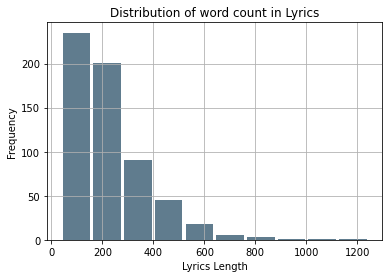

In [23]:
#Distribution of Word Count

import string

Lyrics_length = [] 

# fetches the number of words in each song
for index, i in enumerate(Dataset1['Final_Lyrics']):
    res = len(i.split())
    Lyrics_length.append(res)

import matplotlib.pyplot as plt

Lyrics_length
Dataset1['word_length']=Lyrics_length

# displays the word lengths as histogram 
Dataset1['word_length'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.xlabel('Lyrics Length')
plt.ylabel('Frequency')
plt.title('Distribution of word count in Lyrics')

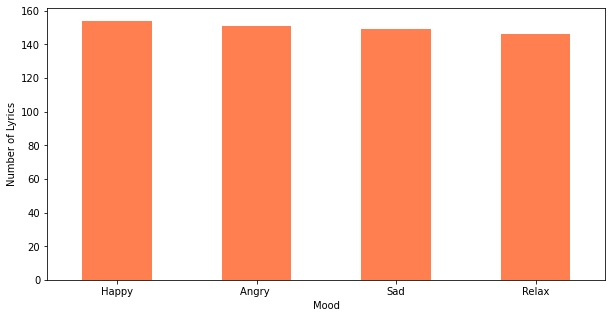

In [24]:
# Displayes the number of Lyrics in each Mood 

categories=Dataset1.groupby('Mood')
plt.figure(figsize=(10,5))
categories.size().sort_values(ascending=False).plot.bar(color='coral')
plt.xticks(rotation=360)
plt.xlabel("Mood")
plt.ylabel("Number of Lyrics")
plt.show()

In [26]:
# Mood By Genre Distribution

import seaborn as sns

gclass = Dataset1.groupby(['Genre', 'Mood']).size().unstack()
print(gclass)
fig = plt.figure(figsize=(10,4))
sns.set(style="white")
pos = np.arange(1,13)

Mood              Angry   Happy  Relax   Sad
Genre                                       
Blue-eyed Soul       1.0    NaN    4.0   3.0
Contemporary R&B     7.0   20.0    4.0   7.0
Country             15.0    8.0   50.0  32.0
Dream Pop            NaN    1.0    3.0   NaN
EDM                  NaN   10.0    NaN   1.0
Folk                 1.0    NaN    3.0   1.0
Hip-Hop             71.0   20.0   23.0  47.0
Indie Pop            1.0    2.0    3.0   8.0
Latin Pop            NaN    NaN    NaN   1.0
Lo-fi Music          NaN    NaN    NaN   1.0
Pop                  2.0   36.0    9.0  11.0
R                    1.0    1.0    1.0   NaN
Reggae              18.0    1.0   23.0  12.0
Rock                33.0   51.0   23.0  25.0
blue-eyed Soul       NaN    3.0    NaN   NaN
hip-Hop              1.0    NaN    NaN   NaN
pop                  NaN    1.0    NaN   NaN


<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'Top 5 most used words')

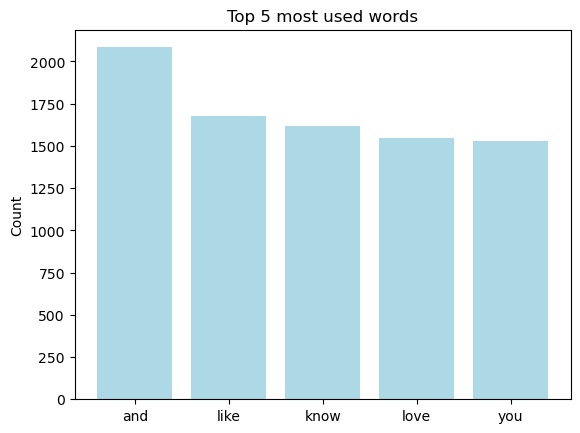

In [27]:
# This method is used to find the top 5 unigram words in the dataset

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(Dataset1['Final_Lyrics'], 5)
df1 = pd.DataFrame(common_words, columns = ['Final_Lyrics' , 'count'])

# This displays the top 5 words with their count in bar plot
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.bar(df1['Final_Lyrics'], df1['count'], align='center',color='Lightblue')
plt.xticks(df1.Final_Lyrics)
plt.ylabel('Count')
plt.title('Top 5 most used words')

Text(0.5, 1.0, 'Top 5 most used bigram words')

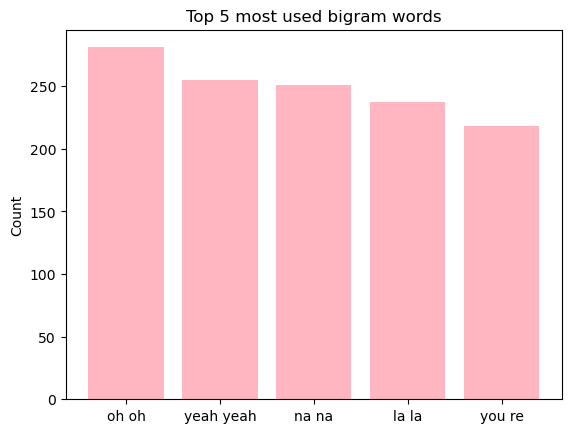

In [28]:
# This method is used to find the top 5 bigram words in the dataset

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(Dataset1['Final_Lyrics'], 5)
df3 = pd.DataFrame(common_words, columns = ['Final_Lyrics' , 'count'])

# This displays the top 5 words with their count in bar plot
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.bar(df3['Final_Lyrics'], df3['count'], align='center',color='lightpink')
plt.xticks(df3.Final_Lyrics)
plt.ylabel('Count')
plt.title('Top 5 most used bigram words')

Text(0.5, 1.0, 'Top 5 most used bigram words')

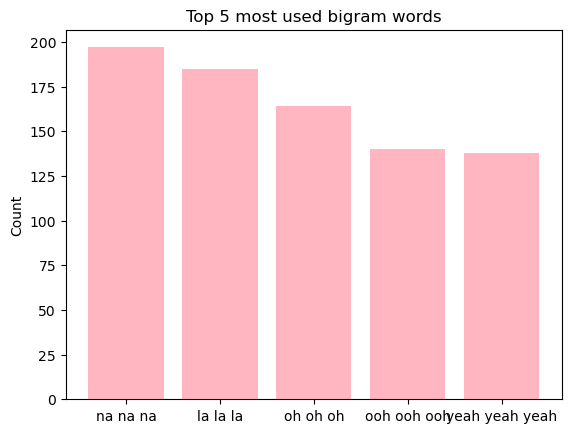

In [29]:
# This method is used to find the top 5 bigram words in the dataset

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(Dataset1['Final_Lyrics'], 5)
df3 = pd.DataFrame(common_words, columns = ['Final_Lyrics' , 'count'])

# This displays the top 5 words with their count in bar plot
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.bar(df3['Final_Lyrics'], df3['count'], align='center',color='lightpink')
plt.xticks(df3.Final_Lyrics)
plt.ylabel('Count')
plt.title('Top 5 most used bigram words')

In [30]:
# convert the lists into string for word cloud creation

def converttostr(input_seq, seperator):
# Join all the strings in list
   final_str = seperator.join(input_seq)
   return final_str

seperator = ' '
print("Scenario#1: ", converttostr(Dataset1['Final_Lyrics'], seperator))

text=converttostr(Dataset1['Final_Lyrics'], seperator)

Scenario#1:  chang, shit I guess chang good whatev y'all nigga hood shit, I'm wit'cha, I ain't mad cha got nothin' love ya, thing, boy yeah, homi I ain't talk i'ma send y'all know I mean? 'caus I ain't mad cha heard y'all tearin' shit kickin' dust, givin' motherfuck yeah, nigga, 'caus I ain't mad cha now nigga kind quick holla hoochi line you just littl smaller, roll got stretch y.a . hit hood swoll 'member jheri curl, didn't quit learn On block, wit'cha glock, trippin' sherm collect call crib, sayin' 've chang Oh, muslim? No dope game heard comin' home, just got bail wannamosqu ,n't wannachase tail It I lost littl homi ,'s chang man hit pen sinnin' game plan when I talk money, struggl when I tell I'm livin' larg, tell's troubl congratul weddin', I hope wife know she got playa life ,'s bullshittin' I know grew apart, probabln't rememb I use fiend sister, went and I school ,'d bomb On motherfuck wrong shit now shit's changn't kick got big money scheme ain't knew heart motherfuck Go toe 

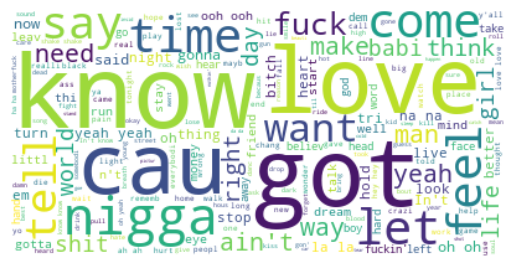

In [31]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

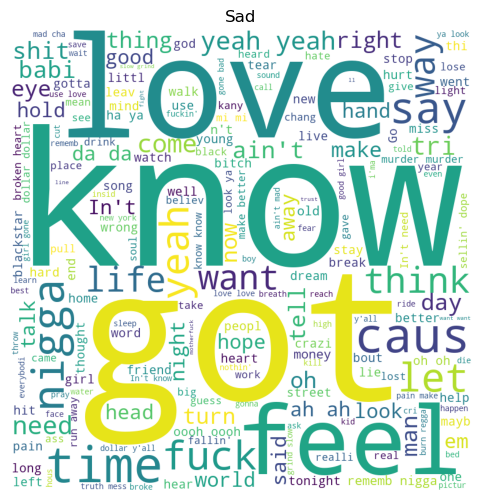

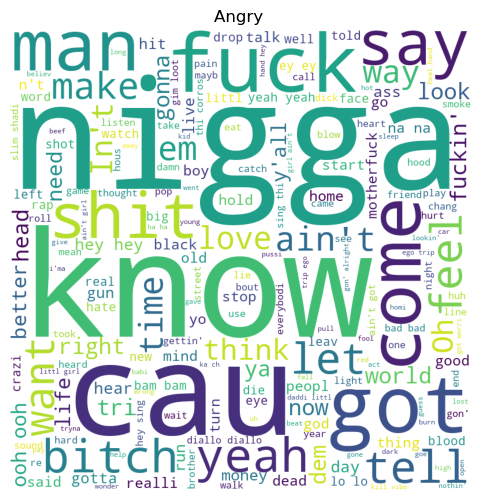

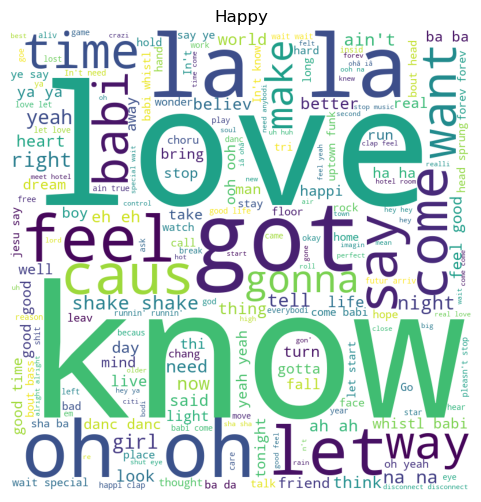

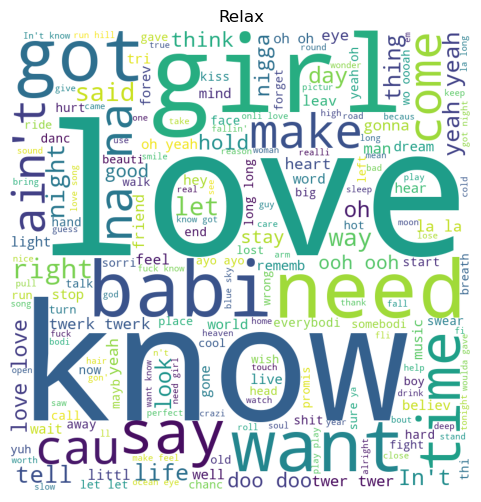

In [33]:
# Mood based WordCloud plot

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

labels = Dataset1['Mood']
unique_labels = labels.unique()
unique_labels
word_dict = dict()
for val in unique_labels:
    sentences = ""
    for l in Dataset1.loc[Dataset1['Mood'] == val]['Final_Lyrics']:
        sentences += " " + l
    word_dict[val] =sentences
for key in word_dict:
    word_cloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 5).generate(word_dict[key])
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.axis("off")
    plt.title(str(key))
    plt.imshow(word_cloud)
    plt.savefig(str(key) + ".png")

In [34]:
# Section - 3 : Lyric Feature Analysis

########################## 1) Latent Semantic Analysis ###############################

In [35]:
# 1) TF-IDF Vectorization : 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\S+',max_df=0.90,min_df=2,max_features=1500)
x_traincv = vectorizer.fit_transform(Dataset1['Final_Lyrics'])
x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(vectorizer.get_feature_names()))
x_traincv_df

&   ''     'bout     'caus  'caus're   'caus's       'em  'em,  'ey  \
0    0.0  0.0  0.000000  0.073228  0.000000  0.019555  0.000000   0.0  0.0   
1    0.0  0.0  0.000000  0.035426  0.035458  0.033110  0.000000   0.0  0.0   
2    0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
3    0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
4    0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.064147   0.0  0.0   
..   ...  ...       ...       ...       ...       ...       ...   ...  ...   
595  0.0  0.0  0.030468  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
596  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
597  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
598  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0   
599  0.0  0.0  0.000000  0.056019  0.000000  0.000000  0.000000   0.0  0.0   

     'fore  ...     young  your     youth  youâ€™r  yuh  zone         â  \
0      0.0  ...  0.014933   0.0  0.000000      0.0  0.0   0.0  0.000000   
1      0.0  ...  0.025284   0.0  0.038163      0.0  0.0   0.0  0.000000   
2      0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.000000   
3      0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.122323   
4      0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.000000   
..     ...  ...       ...   ...       ...      ...  ...   ...       ...   
595    0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.000000   
596    0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.000000   
597    0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.000000   
598    0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.000000   
599    0.0  ...  0.000000   0.0  0.000000      0.0  0.0   0.0  0.000000   

            ‘         ’    ”  
0    0.000000  0.000000  0.0  
1    0.000000  0.000000  0.0  
2    0.000000  0.000000  0.0  
3    0.095637  0.000000  0.0  
4    0.179040  0.036607  0.0  
..        ...       ...  ...  
595  0.000000  0.000000  0.0  
596  0.000000  0.000000  0.0  
597  0.000000  0.000000  0.0  
598  0.000000  0.416437  0.0  
599  0.000000  0.000000  0.0  

[600 rows x 1500 columns]

In [36]:
# Splitting the data into Training and Text Set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
# Assigning the values of X and Y

X = x_traincv_df
Y = Dataset1['Mood']

In [38]:
# Splitting the data into the ratio of 70% and 30%

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100,stratify=Y)

In [39]:
# Applying 10 fold cross validation with entire dataset for training purpose hence training score will be generated for MLP

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Algorithm is trained

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# Accuracy scores of all the parts are averaged

print(cross_val_score(clf, X, Y, cv=10, scoring='accuracy').mean())

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10

0.4


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
# As the data is split into training and test set testing score is generated for MLP

from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# create mutli-layer perceptron classifier

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# train
grid_result = clf.fit(X_train,y_train)

#predict
y_pred_mlp=grid_result.predict(X_test)

# Accuracy Calculation
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_mlp))

Accuracy:  0.43333333333333335


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
# Cross Validation with Logistic Regression on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# LR is trained 
logreg = LogisticRegression(C=2.5,max_iter=140)

# Accuracy is averaged 
print(cross_val_score(logreg, X, Y, cv=10, scoring='accuracy').mean())

0.41833333333333333


In [43]:
# Logistic Regression with testing score

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[140]
C = [2.5]

# parametering tuning is carried out using grid search 
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
logistic_regression= GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid)
grid_result = logistic_regression.fit(X_train,y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
y_pred_lr=logistic_regression.predict(X_test)

# Accuracy Calculation
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_lr))

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver lbfgs supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. T

Best: 0.392857 using {'C': 2.5, 'dual': False, 'max_iter': 140}
Accuracy:  0.42777777777777776


In [49]:
# Cross Validation with Decision Tree on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# training the DCT model
dct = DecisionTreeClassifier(max_depth=180,max_features=1000)

# Averaging the accuracy
print(cross_val_score(dct, X, Y, cv=10, scoring='accuracy').mean())

0.305


In [59]:
# Decision Tree with testing score

from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [180],
    'max_features': [1000]
}

decisiontree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
decisiontreeresult = decisiontree.fit(X_train,y_train)

# Summarize results
print("Best: %f using %s" % (decisiontreeresult.best_score_, decisiontreeresult.best_params_))
y_pred_decisiontree = decisiontree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decisiontree))
print("Precision Score:" ,precision_score(y_test, y_pred_decisiontree, average='weighted'))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Best: 0.300000 using {'max_depth': 180, 'max_features': 1000}
Accuracy: 0.3111111111111111
Precision Score: 0.3123362307886118


In [53]:
# Cross Validation with Gaussian NB on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
# Training the GNB model
gnb = GaussianNB()
# averaging the scores
print(cross_val_score(gnb, X, Y, cv=10, scoring='accuracy').mean())


0.3350000000000001


In [58]:
# Gaussian NB with testing score

from sklearn.naive_bayes import GaussianNB

# Creating the classifier

gnb = GaussianNB()

# training the model

gnb.fit(X_train, y_train)
# predicting the output values
y_predgnb = gnb.predict(X_test)
# calculating the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predgnb))
print("Precision Score:" ,precision_score(y_test, y_predgnb, average='weighted'))

Accuracy: 0.3
Precision Score: 0.29813238222158767


In [60]:
# Cross Validation with Bernoulli on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

# Training the BNB model
bnb = BernoulliNB(alpha=0.1)
# averaging the scores
print(cross_val_score(bnb, X, Y, cv=10, scoring='accuracy').mean())

0.425


In [62]:
# Bernoulli Testing Score with testing score

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.1)
bnb.fit(X_train, y_train)
y_predbnb = bnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predbnb))
print("Precision Score:" ,precision_score(y_test, y_predbnb, average='weighted'))

Accuracy: 0.4388888888888889
Precision Score: 0.43160591234067935


In [63]:
# Cross Validation with RandomForest on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)
print(cross_val_score(rf, X, Y, cv=10, scoring='accuracy').mean())

0.41833333333333345


In [64]:
# RandomForest with testing score

from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [160],
    'max_features': [200],
    'n_estimators': [100]
}

rf=GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid,
                           n_jobs = -1, verbose = 2)
rfresult=rf.fit(X_train,y_train)

# print("Best: %f using %s" % (rfresult.best_score_, rfresult.best_params_))

y_predrf=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))
print("Precision Score:" ,precision_score(y_test, y_predrf, average='weighted'))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Accuracy: 0.42777777777777776
Precision Score: 0.4184927730302383


In [7]:
# 2) Count Vectorization : 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_countv = CountVectorizer(token_pattern=r'\S+',max_df=0.90,min_df=2,max_features=1500)
x_train_countvec = vectorizer_countv.fit_transform(Dataset1['Final_Lyrics'])
x_train_countvec_df = pd.DataFrame(x_train_countvec.toarray(),columns=list(vectorizer_countv.get_feature_names()))
x_train_countvec_df

&  ''  'bout  'caus  'caus're  'caus's  'em  'em,  'ey  'fore  ...  \
0    0   0      0      7         0        1    0     0    0      0  ...   
1    0   0      0      2         1        1    0     0    0      0  ...   
2    0   0      0      0         0        0    0     0    0      0  ...   
3    0   0      0      0         0        0    0     0    0      0  ...   
4    0   0      0      0         0        0    2     0    0      0  ...   
..  ..  ..    ...    ...       ...      ...  ...   ...  ...    ...  ...   
595  0   0      1      0         0        0    0     0    0      0  ...   
596  0   0      0      0         0        0    0     0    0      0  ...   
597  0   0      0      0         0        0    0     0    0      0  ...   
598  0   0      0      0         0        0    0     0    0      0  ...   
599  0   0      0      1         0        0    0     0    0      0  ...   

     young  your  youth  youâ€™r  yuh  zone  â  ‘   ’  ”  
0        1     0      0        0    0     0  0  0   0  0  
1        1     0      1        0    0     0  0  0   0  0  
2        0     0      0        0    0     0  0  0   0  0  
3        0     0      0        0    0     0  2  2   0  0  
4        0     0      0        0    0     0  0  4   1  0  
..     ...   ...    ...      ...  ...   ... .. ..  .. ..  
595      0     0      0        0    0     0  0  0   0  0  
596      0     0      0        0    0     0  0  0   0  0  
597      0     0      0        0    0     0  0  0   0  0  
598      0     0      0        0    0     0  0  0  12  0  
599      0     0      0        0    0     0  0  0   0  0  

[600 rows x 1500 columns]

In [8]:
# Splitting the data into Training and Text Set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Assigning the values of X and Y

X1 = x_train_countvec_df
Y1 = Dataset1['Mood']

In [10]:
# Splitting the data into the ratio of 70% and 30%

X1_train, X1_test, y1_train, y1_test = train_test_split( X1, Y1, test_size = 0.3, random_state = 100,stratify=Y1)

In [12]:
# Applying 10 fold cross validation with entire dataset for training purpose hence training score will be generated for MLP

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Algorithm is trained 

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# Accuracy scores of all the parts are averaged

print(cross_val_score(clf, X1, Y1, cv=10, scoring='accuracy').mean())

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_mu

0.4016666666666667


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [14]:
# As the data is split into training and test set testing score is generated for MLP

# create mutli-layer perceptron classifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# train
grid_result = clf.fit(X1_train,y1_train)
y_pred_mlp=grid_result.predict(X1_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_pred_mlp, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_pred_mlp)
recall_metric = recall_score(y1_test, y_pred_mlp, average = "macro")
f1_metric = f1_score(y1_test, y_pred_mlp, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.4018659688246672
Accuracy Score: 0.4
Recall Score: 0.39925889328063235
F1 Score: 0.39273253118189827


In [15]:
# Cross Validation with Logistic Regression on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=2.5,max_iter=140)
print(cross_val_score(logreg, X1, Y1, cv=10, scoring='accuracy').mean())

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

0.3783333333333333


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression= LogisticRegression(C=2.5,max_iter=140)
logistic_regression.fit(X1_train,y1_train)
y_pred_lr=logistic_regression.predict(X1_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_pred_lr, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_pred_lr)
recall_metric = recall_score(y1_test, y_pred_lr, average = "macro")
f1_metric = f1_score(y1_test, y_pred_lr, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.3889445080091533
Accuracy Score: 0.38333333333333336
Recall Score: 0.38270750988142294
F1 Score: 0.3792520732279768


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Cross Validation with Decision Tree on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=180,max_features=1000)
print(cross_val_score(dct, X1, Y1, cv=10, scoring='accuracy').mean())

0.32666666666666666


In [22]:
# Decision Tree with testing score

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decisiontree = DecisionTreeClassifier(max_depth=180,max_features=1000,criterion="entropy")
decisiontree = decisiontree.fit(X1_train,y1_train)
y_pred_decisiontree = decisiontree.predict(X1_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_pred_decisiontree, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_pred_decisiontree)
recall_metric = recall_score(y1_test, y_pred_decisiontree, average = "macro")
f1_metric = f1_score(y1_test, y_pred_decisiontree, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.3900691699604743
Accuracy Score: 0.3888888888888889
Recall Score: 0.38848814229249007
F1 Score: 0.38925366890071333


In [23]:
# Cross Validation with Gaussian NB on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
print(cross_val_score(gnb, X1, Y1, cv=10, scoring='accuracy').mean())

0.33666666666666667


In [27]:
# Gaussian NB with testing score

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()

gnb.fit(X1_train,y1_train)

y_predgnb = gnb.predict(X1_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_predgnb, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_predgnb)
recall_metric = recall_score(y1_test, y_predgnb, average = "macro")
f1_metric = f1_score(y1_test, y_predgnb, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.3100308348016572
Accuracy Score: 0.32222222222222224
Recall Score: 0.3212779973649539
F1 Score: 0.2985365276110577


In [29]:
#cross Validation with RandomForest on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)
print(cross_val_score(rf, X1, Y1, cv=10, scoring='accuracy').mean())

0.43166666666666664


In [31]:
# RandomForest with testing score

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf=RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)

rf.fit(X1_train,y1_train)

y_predrf=rf.predict(X1_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_predrf, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_predrf)
recall_metric = recall_score(y1_test, y_predrf, average = "macro")
f1_metric = f1_score(y1_test, y_predrf, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.4245511319281811
Accuracy Score: 0.42777777777777776
Recall Score: 0.4274044795783926
F1 Score: 0.41896354591644325


In [32]:
# Cross Validation with Bernoulli on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.1)
print(cross_val_score(bnb, X1, Y1, cv=10, scoring='accuracy').mean())

0.425


In [34]:
# Bernoulli with testing score

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bnb = BernoulliNB(alpha=0.1)

bnb.fit(X1_train,y1_train)
y_predbnb = bnb.predict(X1_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_predbnb, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_predbnb)
recall_metric = recall_score(y1_test, y_predbnb, average = "macro")
f1_metric = f1_score(y1_test, y_predbnb, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.43114129001225776
Accuracy Score: 0.4388888888888889
Recall Score: 0.43802700922266147
F1 Score: 0.42360286883667514


In [35]:
# 3) Hashing Vectorization:

from sklearn.feature_extraction.text import HashingVectorizer

vectorizer_hash = HashingVectorizer(n_features=3000,alternate_sign=False)
x_train_hash = vectorizer_hash.fit_transform(Dataset1['Final_Lyrics'])
x_train_hash_df = pd.DataFrame(x_train_hash.toarray())
x_train_hash_df

0     1     2         3     4     5     6     7     8     9     ...  \
0     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
..    ...   ...   ...       ...   ...   ...   ...   ...   ...   ...  ...   
595   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
596   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
597   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
598   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
599   0.0   0.0   0.0  0.144338   0.0   0.0   0.0   0.0   0.0   0.0  ...   

     2990  2991  2992  2993  2994      2995      2996  2997  2998  2999  
0     0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
1     0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
2     0.0   0.0   0.0   0.0   0.0  0.121491  0.000000   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...       ...       ...   ...   ...   ...  
595   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
596   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
597   0.0   0.0   0.0   0.0   0.0  0.120550  0.000000   0.0   0.0   0.0  
598   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
599   0.0   0.0   0.0   0.0   0.0  0.000000  0.072169   0.0   0.0   0.0  

[600 rows x 3000 columns]

In [36]:
# Splitting the data into Training and Text Set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
# Assigning the values of X and Y

X2 = x_train_hash_df
Y2 = Dataset1['Mood']

In [38]:
# Splitting the data into the ratio of 70% and 30%

X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size = 0.3, random_state = 100,stratify=Y2)

In [39]:
# Applying 10 fold cross validation with entire dataset for training purpose hence training score will be generated for MLP

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Algorithm is trained 
clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)
# Accuracy scores of all the parts are averaged
print(cross_val_score(clf, X2, Y2, cv=10, scoring='accuracy').mean())

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10

0.38500000000000006


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [40]:
# As the data is split into training and test set testing score is generated for MLP

# create mutli-layer perceptron classifier

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)
# train
grid_result = clf.fit(X2_train,y2_train)
y_pred_mlp=grid_result.predict(X2_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_pred_mlp, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_pred_mlp)
recall_metric = recall_score(y1_test, y_pred_mlp, average = "macro")
f1_metric = f1_score(y1_test, y_pred_mlp, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.29814699792960664
Accuracy Score: 0.29444444444444445
Recall Score: 0.2939833113746157
F1 Score: 0.20231490589546855


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Cross Validation with Logistic Regression on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=2.5,max_iter=140)
print(cross_val_score(logreg, X2, Y2, cv=10, scoring='accuracy').mean())

0.4066666666666666


In [42]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression= LogisticRegression(C=2.5,max_iter=140)
logistic_regression.fit(X2_train,y2_train)
y_pred_lr=logistic_regression.predict(X2_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_pred_lr, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_pred_lr)
recall_metric = recall_score(y1_test, y_pred_lr, average = "macro")
f1_metric = f1_score(y1_test, y_pred_lr, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.4352119164619165
Accuracy Score: 0.43333333333333335
Recall Score: 0.43184014053579267
F1 Score: 0.42761543867772944


In [43]:
# Cross Validation with Decision Tree on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=180,max_features=1000)
print(cross_val_score(dct, X2, Y2, cv=10, scoring='accuracy').mean())

0.30166666666666664


In [44]:
# Decision Tree with testing score

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decisiontree = DecisionTreeClassifier(max_depth=180,max_features=1000,criterion="entropy")

decisiontree = decisiontree.fit(X2_train,y2_train)
y_pred_decisiontree = decisiontree.predict(X2_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_pred_decisiontree, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_pred_decisiontree)
recall_metric = recall_score(y1_test, y_pred_decisiontree, average = "macro")
f1_metric = f1_score(y1_test, y_pred_decisiontree, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.3512582131003184
Accuracy Score: 0.34444444444444444
Recall Score: 0.34380215195432584
F1 Score: 0.3435267989187326


In [45]:
# Cross Validation with Gaussian NB on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
print(cross_val_score(gnb, X2, Y2, cv=10, scoring='accuracy').mean())

0.3166666666666666


In [46]:
# Gaussian NB with testing score

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()

gnb.fit(X2_train,y2_train)

y_predgnb = gnb.predict(X2_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_predgnb, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_predgnb)
recall_metric = recall_score(y1_test, y_predgnb, average = "macro")
f1_metric = f1_score(y1_test, y_predgnb, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.33503996003996006
Accuracy Score: 0.32222222222222224
Recall Score: 0.32287549407114624
F1 Score: 0.28050754262140265


In [47]:
# Cross Validation with RandomForest on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)
print(cross_val_score(rf, X2, Y2, cv=10, scoring='accuracy').mean())

0.43833333333333335


In [50]:
# RandomForest with testing score

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf=RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)

rf.fit(X2_train,y2_train)
y_predrf=rf.predict(X2_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_predrf, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_predrf)
recall_metric = recall_score(y1_test, y_predrf, average = "macro")
f1_metric = f1_score(y1_test, y_predrf, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.42518145161290327
Accuracy Score: 0.4444444444444444
Recall Score: 0.444076635924462
F1 Score: 0.42339344272982715


In [51]:
# Cross Validation with Bernoulli on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.1)
print(cross_val_score(bnb, X2, Y2, cv=10, scoring='accuracy').mean())

0.38


In [53]:
# Bernoulli with testing score

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bnb = BernoulliNB(alpha=0.1)

bnb.fit(X2_train,y2_train)
y_predbnb = bnb.predict(X2_test)

# Accuracy Calculation

precision_metric = precision_score(y1_test, y_predbnb, average = "macro")
accuracy_metric= accuracy_score(y1_test, y_predbnb)
recall_metric = recall_score(y1_test, y_predbnb, average = "macro")
f1_metric = f1_score(y1_test, y_predbnb, average = "macro")


print("Precision Score:",precision_metric)
print("Accuracy Score:",accuracy_metric)
print("Recall Score:",recall_metric)
print("F1 Score:",f1_metric)

Precision Score: 0.37583943833943834
Accuracy Score: 0.38333333333333336
Recall Score: 0.3835638998682477
F1 Score: 0.3733276382818495


In [56]:
# creates a dataframe with the accuracies of each ML algorithm with the vectorizer

dfObj = pd.DataFrame(columns=['Vectorizer', 'Algorithm', 'Accuracy'])
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'MLP','Accuracy':43.00}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'LR','Accuracy':42.05}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'DCT','Accuracy':30.45}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'GNB','Accuracy':38.33}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'BNB','Accuracy':47.30}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'RF','Accuracy':43.33}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'MLP','Accuracy':38.83}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'LR','Accuracy':36.66}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'DCT','Accuracy':34.40}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'GNB','Accuracy':39.16}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'BNB','Accuracy':53.30}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'RF','Accuracy':41.60}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'MLP','Accuracy':41.60}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'LR','Accuracy':45.8}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'DCT','Accuracy':30.00}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'GNB','Accuracy':28.30}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'BNB','Accuracy':46.60}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'RF','Accuracy':45.00}, ignore_index=True)

In [57]:
print("Dataframe Contens ", dfObj, sep='\n')

Dataframe Contens 
           Vectorizer Algorithm  Accuracy
0   TF-IDF Vectroizer       MLP     43.00
1   TF-IDF Vectroizer        LR     42.05
2   TF-IDF Vectroizer       DCT     30.45
3   TF-IDF Vectroizer       GNB     38.33
4   TF-IDF Vectroizer       BNB     47.30
5   TF-IDF Vectroizer        RF     43.33
6    Count Vectroizer       MLP     38.83
7    Count Vectroizer        LR     36.66
8    Count Vectroizer       DCT     34.40
9    Count Vectroizer       GNB     39.16
10   Count Vectroizer       BNB     53.30
11   Count Vectroizer        RF     41.60
12    Hash Vectroizer       MLP     41.60
13    Hash Vectroizer        LR     45.80
14    Hash Vectroizer       DCT     30.00
15    Hash Vectroizer       GNB     28.30
16    Hash Vectroizer       BNB     46.60
17    Hash Vectroizer        RF     45.00


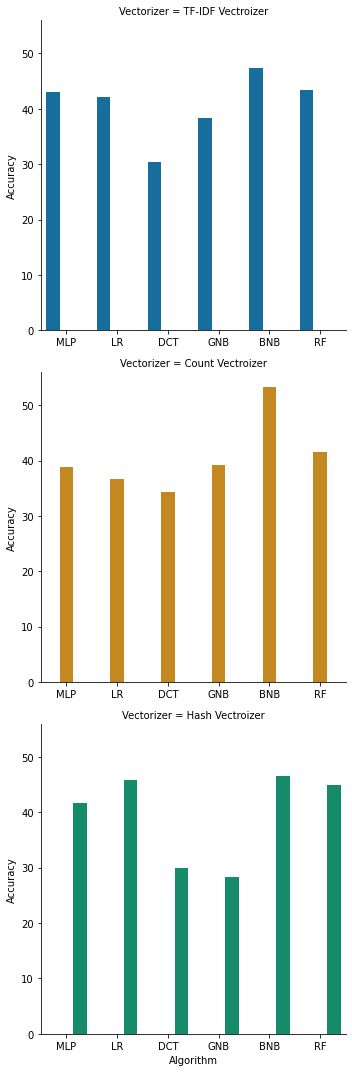

In [59]:
# Displays the results of Algorithm vs Accuracy in bar plot

import seaborn as sns

sns.factorplot(x='Algorithm', y='Accuracy', hue='Vectorizer', data=dfObj, kind='bar',row="Vectorizer",size=5,sharex='row'
               ,palette='colorblind')

In [ ]:
# Scetion 3: Lyrics Feature Analysis

############################ 2) Content Based Analysis (Bag of Words) ####################

In [60]:
#Import all the necessary packages for classification problem

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from nltk.tokenize import WordPunctTokenizer
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gagan Rangu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [61]:
#Reading Dataset

CBA = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Final_Dataset.csv', encoding='utf-8')

In [63]:
#Converting Lyrics column to String datatype 

CBA['Final_Lyrics'].astype(str)
CBA['Final_Lyrics'].head(5)

0    chang, shit I guess chang good whatev y'all ni...
1    It's just world nothin' lose It's just world, ...
2    I'm sure surpris At road taken caus million li...
3    yeah, uh-huh So seduct I'll candi shop I'll le...
4    My life, life make wannarun away there's place...
Name: Final_Lyrics, dtype: object

In [64]:
# Removing all rows having any blank cells
CBA=CBA.dropna(axis=0)
CBA = CBA.reset_index(drop=True)

In [65]:
# Replacing the data havinh white space and blank with NAN
CBA['Final_Lyrics'].replace('', np.nan, inplace=True)
CBA['Final_Lyrics'].replace(' ', np.nan, inplace=True)
print(CBA)

     Unnamed: 0        Artist    Genre                           Title  \
0             0          2Pac  Hip-Hop              I Ain’t Mad At Cha   
1             1          2Pac  Hip-Hop            Me Against the World   
2             2          4Him      Pop   Strange Way To Save The World   
3             3       50 Cent  Hip-Hop                      Candy Shop   
4             4       50 Cent  Hip-Hop                         My Life   
..          ...           ...      ...                             ...   
595         595     Yellowman   Reggae             I’m Getting Married   
596         596     Yellowman   Reggae  We Wish You A Reggae Christmas   
597         597  Zara Larsson      Pop                       Lush Life   
598         598  Ziggy Marley   Reggae                      Lighthouse   
599         599  Ziggy Marley   Reggae             Love Is My Religion   

                                                Lyrics    Mood  \
0    Change, shit\nI guess change is good for

In [66]:
#Finding Missing Values

for col in CBA.columns:
    print(col, CBA[col].isnull().sum())

Unnamed: 0 0
Artist 0
Genre 0
Title 0
Lyrics 0
Mood 0
TokenizeWords 0
StopWordsRemoved 0
Final_Lyrics 0


In [67]:
# Converting the Lyrics column datatype to string
CBA['Final_Lyrics'] = CBA['Final_Lyrics'].astype(str)

In [82]:
# Assigning the values of A and B

A = CBA['Final_Lyrics']
B = CBA['Mood']

In [83]:
class POSTogging:
    def __init__(self):
        self.wpt = WordPunctTokenizer()
    def __call__(self, doc):
        text = self.wpt.tokenize(doc)
        return [word + '/' + tag for word, tag in nltk.pos_tag(text)]

In [84]:
# Defining n-gram models - Unigram , Bigram , Trigram

# Defining combibation of Unigram + Bigram , Bigram + Trigram , Unigram + Bigram + Trigram

n_gram_pipeline = dict()
n_gram_pipeline['Unigram'] = (1, 1)
n_gram_pipeline['Bigram'] = (2, 2)
n_gram_pipeline['Trigram'] = (3, 3)
n_gram_pipeline['Unigram + Bigram'] = (1, 2)
n_gram_pipeline['Bigram + Trigram'] = (1, 1)
n_gram_pipeline['Unigram + Bigram  + Trigram'] = (1, 3)

In [85]:
# Defining TF-IDF vectorization to convert lyrics into feature Vectors

n_gram_tfidf_features_pipeline = dict()
for features in n_gram_pipeline.keys():
        n_gram_tfidf_features_pipeline[features] = TfidfVectorizer(min_df=3, max_features=3000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=n_gram_pipeline[features],
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english")
        n_gram_tfidf_features_pipeline[str(features) + " + POS"] = TfidfVectorizer(min_df=3, max_features=3000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=n_gram_pipeline[features],
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english", tokenizer=POSTogging())

In [86]:
# Spliting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state = 42)

In [87]:
# Classifiers: LinearSVC, Logistic Regression, Decision Tree, Random Forest and Multi-layer Perceptron and create a pipeline

models_pipeline = dict()
models_pipeline['Linear SVC'] = LinearSVC(random_state=0, tol=1e-5)
models_pipeline['Logistic Regression'] = LogisticRegression(solver='lbfgs', multi_class='auto')
models_pipeline['Decision Tree'] = DecisionTreeClassifier(max_depth=5)
models_pipeline['Random Forest'] = RandomForestClassifier(max_depth=5, n_estimators=10)
models_pipeline['MLP (ANN)'] = MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1500)

In [88]:
# Confusion Matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Ref: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout(pad=5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model : Features : Model Accuracy : 5-fold cross-validation mean accuracy
Linear SVC :Unigram :0.45 :0.45 (+/- 0.09)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Unigram + POS :0.43 :0.45 (+/- 0.03)
Linear SVC :Bigram :0.38 :0.32 (+/- 0.06)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Bigram + POS :0.37 :0.37 (+/- 0.07)
Linear SVC :Trigram :0.21 :0.27 (+/- 0.02)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Trigram + POS :0.31 :0.32 (+/- 0.11)
Linear SVC :Unigram + Bigram :0.48 :0.46 (+/- 0.05)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Unigram + Bigram + POS :0.39 :0.43 (+/- 0.04)
Linear SVC :Bigram + Trigram :0.45 :0.45 (+/- 0.09)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Bigram + Trigram + POS :0.43 :0.45 (+/- 0.03)
Linear SVC :Unigram + Bigram  + Trigram :0.47 :0.46 (+/- 0.05)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Unigram + Bigram  + Trigram + POS :0.40 :0.44 (+/- 0.06)
Logistic Regression :Unigram :0.43 :0.46 (+/- 0.09)
Logistic Regression :Unigram + POS :0.40 :0.44 (+/- 0.06)
Logistic Regression :Bigram :0.37 :0.33 (+/- 0.06)
Logistic Regression :Bigram + POS :0.38 :0.40 (+/- 0.06)
Logistic Regression :Trigram :0.21 :0.27 (+/- 0.01)
Logistic Regression :Trigram + POS :0.33 :0.33 (+/- 0.14)
Logistic Regression :Unigram + Bigram :0.45 :0.46 (+/- 0.06)
Logistic Regression :Unigram + Bigram + POS :0.38 :0.45 (+/- 0.05)
Logistic Regression :Bigram + Trigram :0.43 :0.46 (+/- 0.09)
Logistic Regression :Bigram + Trigram + POS :0.40 :0.44 (+/- 0.06)
Logistic Regression :Unigram + Bigram  + Trigram :0.46 :0.46 (+/- 0.06)
Logistic Regression :Unigram + Bigram  + Trigram + POS :0.41 :0.45 (+/- 0.04)
Decision Tree :Unigram :0.38 :0.38 (+/- 0.03)
Decision Tree :Unigram + POS :0.34 :0.31 (+/- 0.09)
Decision Tree :Bigram :0.19 :0.27 (+/- 0.03)
Decision Tree :Bigram + POS :0.23 :0.29 (+/- 0.06)
Dec

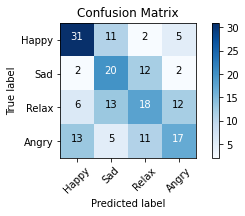

In [89]:
# fit and transform the data, predict the accuracy from different classifiers

print("Model : Features : Model Accuracy : 5-fold cross-validation mean accuracy")
best_model_y_pred = list()
best_accuracy = 0
text_file = open("model_results.txt","w+")
for models in models_pipeline.keys():
    for tfv in n_gram_tfidf_features_pipeline.keys():
        pipeline = make_pipeline(n_gram_tfidf_features_pipeline[tfv], models_pipeline[models])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        tf_idf_vectorizer = n_gram_tfidf_features_pipeline[tfv]
        X_tf_idf = tf_idf_vectorizer.fit_transform(A)
        scores = cross_val_score(models_pipeline[models], X_tf_idf, B, cv=5)
        k_fold_mean_accuracy = ("%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        test_accuracy = accuracy_score(y_pred, y_test)
        test_accuracy_formatted = ("%0.2f" % (test_accuracy))
        stream = str(models) + " :" + str(tfv) + " :" + str(test_accuracy_formatted) + " :" + str(k_fold_mean_accuracy)
        print(stream)
        text_file.write(stream + "\n")
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model_y_pred = y_pred
text_file.close()
cnf_matrix = confusion_matrix(y_test, best_model_y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Happy', 'Sad', 'Relax', 'Angry'], title='Confusion Matrix')
plt.savefig("cm.png", dpi=500)
plt.show()

In [90]:
#Section - 3 : Lyric Feature Analysis: 

############################# 3) Porter Stemming and Classification #########################

In [20]:
# Reading SongsLyrics.csv training file

import pandas as pd

df = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Mood Classification/SongLyrics.csv',encoding ='latin-1')
df.head(10)

Artist           Genre                           Title  \
0               2Pac         Hip-Hop            Me Against the World   
1               4Him             Pop   Strange Way To Save The World   
2  Twenty One Pilots       Indie Pop                    Stressed Out   
3            50 Cent         Hip-Hop                      Candy Shop   
4            50 Cent         Hip-Hop                     If I Cannot   
5            50 Cent         Hip-Hop                 What Up Gangsta   
6            50 Cent         Hip-Hop                       Back Down   
7            50 Cent         Hip-Hop               Patiently Waiting   
8           Adam Ant            Rock  Mohair Locker Room Pin-Up Boys   
9              Adele  Blue-eyed Soul                Someone Like You   

                                              Lyrics    Mood  
0  It's just me against the world\nNothin' to los...  Angry   
1  I'm sure he must have been surprised\nAt where...   Happy  
2  I wish I found some better sounds no one's eve...     Sad  
3  Yeah, uh-huh\nSo seductive\n\nI'll take you to...   Relax  
4  Yeah, ha ha, yeah, yeah\n\nIf I can't do it, h...  Angry   
5  G-Unit (BO!), we in here (BO!)\nWe can get the...  Angry   
6  Woo!\nYeah\nG-G-G-G-G-Unit (G-Unit)\nHa ha\n\n...  Angry   
7  Hey Em, you know you're my favorite white boy,...  Angry   
8  What a ride what a ride\nYou got me dizzy with...   Happy  
9  I heard that you're settled down\nThat you fou...   Relax

In [21]:
# Finding the total number of rows and columns in data

df.shape

(504, 5)

In [22]:
# Converting the Lyrics column datatype to string

df['Lyrics'] = df['Lyrics'].astype(str)

In [25]:
# Label Encoding ( Converting Mood categories to Numeric)

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

X_train = df['Lyrics'].values 

y_train = df['Mood'].values

print('before: %s ...' %y_train[:10])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print('after: %s ...' %y_train[:10])

before: ['Angry ' 'Happy' 'Sad' 'Relax' 'Angry ' 'Angry ' 'Angry ' 'Angry '
 'Happy' 'Relax'] ...
after: [0 1 3 2 0 0 0 0 1 2] ...


In [26]:
# Save object to disk

import pickle

pickle_out = open('./lyrics_label_encoder_py.pkl', 'wb')
pickle.dump(le, pickle_out)
pickle_out.close()

In [27]:
# Feature Extraction : Porter Stemmer word counts and vectorizers ( Tfidf Vectorizer and CountVectorizer )##########

In [28]:
# Porter Stemmer

import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()

def porter_tokenizer(text, stemmer=porter_stemmer):
    """
    A Porter-Stemmer-Tokenizer hybrid to splits sentences into words (tokens) 
    and applies the porter stemming algorithm to each of the obtained token. 
    Tokens that are only consisting of punctuation characters are removed as well.
    Only tokens that consist of more than one letter are being kept.
    
    Parameters
    ----------
        
    text : `str`. 
      A sentence that is to split into words.
        
    Returns
    ----------
    
    no_punct : `str`. 
      A list of tokens after stemming and removing Sentence punctuation patterns.
    
    """
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

In [29]:
# Testing 

porter_tokenizer("Won't !!! --- Come to me. Don't come ")

['won', 't', 'come', 'to', 'me', 'don', 't', 'come']

In [30]:
# Extracting Stopwords

import nltk
nltk.download('stopwords')
stp = nltk.corpus.stopwords.words('english')
with open('./stopwords_eng.txt', 'w') as outfile:
    outfile.write('\n'.join(stp))

[nltk_data] Downloading package stopwords to C:\Users\Gagan
[nltk_data]     Rangu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
with open('./stopwords_eng.txt', 'r') as infile:
    stop_words = infile.read().splitlines()
print('stop words %s ...' %stop_words[:10])

stop words ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"] ...


In [32]:
# Vectorizers Testing

# 1) Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer,
            ngram_range=(1,1)
    )

In [33]:
# Test A - Ngrams = 1

vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn`t"]

vec = vec.fit(vocab)

sentence1 = vec.transform([u'The swimmer likes swimming.'])
sentence2 = vec.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['like', 'swim', 'swimmer']
Sentence 1: [[1 1 1]]
Sentence 2: [[0 1 1]]


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [34]:
# Fitting Lyrics

vec = vec.fit(X_train.ravel())
print('Vocabulary size: %s' %len(vec.get_feature_names()))

Vocabulary size: 7562


In [35]:
# Test B - Ngrams = 2

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer,
            ngram_range=(2,2)
    )

vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn`t"]

vec = vec.fit(vocab)

sentence1 = vec.transform([u'The swimmer likes swimming.'])
sentence2 = vec.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['like swim', 'swim swim', 'swimmer like']
Sentence 1: [[1 0 1]]
Sentence 2: [[0 0 0]]


In [36]:
# 2) Count Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer
    )

In [37]:
# Testing X

vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn't"]

tfidf = tfidf.fit(vocab)

sentence1 = tfidf.transform([u'The swimmer likes swimming.'])
sentence2 = tfidf.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %tfidf.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['like', 'swim', 'swimmer']
Sentence 1: [[0.57735027 0.57735027 0.57735027]]
Sentence 2: [[0.         0.70710678 0.70710678]]


In [38]:
# Fitting Lyrics

tfidf = tfidf.fit(X_train.ravel())

print('Vocabulary size: %s' %len(tfidf.get_feature_names()))

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Vocabulary size: 7562


In [39]:
# ******************************** Model Selection *****************************

# Naive Bayes classifiers ( BernoulliNB and MultinominalNB)

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

In [40]:
# Performance Metric

from sklearn import metrics

f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, average = 'micro')

In [41]:
# Grid Search 

# CountVectorizer and BernoulliNB()

from sklearn.model_selection import learning_curve, GridSearchCV
from pprint import pprint

pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BernoulliNB())
])

parameters_1 = dict(
    vect__binary=[True],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
print("parameters:")
pprint(parameters_1, depth=2)
grid_search_1.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [True],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x000001B6F1DCBDC0>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\ga

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\featur

Best score: 0.412
Best parameters set:
	vect__binary: True
	vect__ngram_range: (1, 1)
	vect__stop_words: None
	vect__tokenizer: <function porter_tokenizer at 0x000001B6F1DCBDC0>


In [42]:
# CountVectorizer and MultinomialNB()

from sklearn.model_selection import learning_curve, GridSearchCV

pipeline_2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

parameters_3 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_3 = GridSearchCV(pipeline_2, 
                           parameters_3, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_2.steps])
print("parameters:")
pprint(parameters_3, depth=2)
grid_search_3.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_3.best_score_)
print("Best parameters set:")
best_parameters_3 = grid_search_3.best_estimator_.get_params()
for param_name in sorted(parameters_3.keys()):
    print("\t%s: %r" % (param_name, best_parameters_3[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x000001B6F1DCBDC0>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\ga

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\featur

Best score: 0.456
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.4min finished


In [43]:
# Tf-idf Vectorizer and BernoulliNB()

from sklearn.model_selection import learning_curve, GridSearchCV

pipeline_3 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', BernoulliNB())
])

parameters_4 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_4 = GridSearchCV(pipeline_3, 
                           parameters_4, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_3.steps])
print("parameters:")
pprint(parameters_4, depth=2)
grid_search_4.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_4.best_score_)
print("Best parameters set:")
best_parameters_4 = grid_search_4.best_estimator_.get_params()
for param_name in sorted(parameters_4.keys()):
    print("\t%s: %r" % (param_name, best_parameters_4[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x000001B6F1DCBDC0>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\ga

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\featur

Best score: 0.412
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: None
	vect__tokenizer: <function porter_tokenizer at 0x000001B6F1DCBDC0>


In [44]:
# # Tf-idf Vectorizer and MultinomialNB()

from sklearn.model_selection import learning_curve, GridSearchCV

pipeline_4 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

parameters_4 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_4 = GridSearchCV(pipeline_4, 
                           parameters_4, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_4.steps])
print("parameters:")
pprint(parameters_4, depth=2)
grid_search_4.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_4.best_score_)
print("Best parameters set:")
best_parameters_4 = grid_search_4.best_estimator_.get_params()
for param_name in sorted(parameters_4.keys()):
    print("\t%s: %r" % (param_name, best_parameters_4[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x000001B6F1DCBDC0>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\ga

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\featur

Best score: 0.414
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.5min finished


In [124]:
# Validation 1 ( Tf-idf and MultinominalNB())

In [45]:
final_clf = Pipeline([
                ('vect', TfidfVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=porter_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', MultinomialNB(alpha=1.0)),
               ])
final_clf.fit(X_train, y_train)

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function porter_tokenizer at 0x000001B6F1DCBDC0>)),
                ('clf', MultinomialNB())])

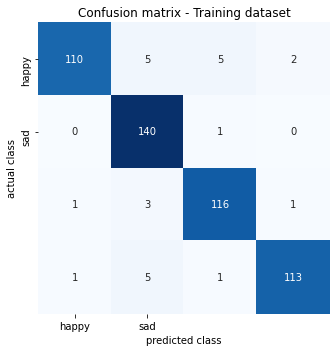

In [49]:
# Confusion Matrix for Training Dataset

import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_train, final_clf.predict(X_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

In [50]:
# Reading Validation Datset

df = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Mood Classification/Validation_Set.csv', encoding = 'latin-1')

X_valid = df['Lyrics'].values 
y_valid = df['Mood'].values

y_valid = le.transform(y_valid)

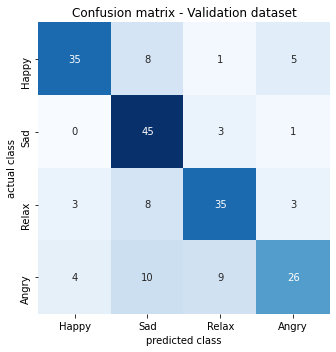

In [51]:
# Confusion Matrix for Validation Dataset

cm = metrics.confusion_matrix(y_valid, final_clf.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['Happy','Sad','Relax','Angry'],
            xticklabels=['Happy','Sad','Relax','Angry'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

In [52]:
# Results : (Accuracy, precision, F1Score, Recall)

from sklearn import metrics

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True,average='macro')
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True,average='macro')
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True,average='macro')

In [53]:
d = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [54]:
d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_train, y_true=y_train))

d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))

In [55]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

ACC (%)  PRE (%)  REC (%)  F1 (%)
Training      95.04    95.36    94.87   95.02
Validation    71.94    73.48    71.94   71.50

In [56]:
# Validation 2 ( Tf-idf and BernoulliNB())

final_clf1 = Pipeline([
                ('vect', TfidfVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=porter_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', BernoulliNB(alpha=1.0)),
               ])
final_clf1.fit(X_train, y_train)

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function porter_tokenizer at 0x000001B6F1DCBDC0>)),
                ('clf', BernoulliNB())])

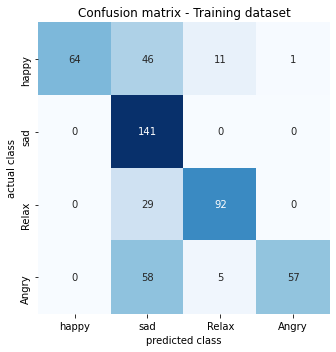

In [57]:
# Confusion Matrix for Training Dataset

import matplotlib as mpl
import numpy as np

cm = metrics.confusion_matrix(y_train, final_clf1.predict(X_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','Relax','Angry'],
            xticklabels=['happy','sad','Relax','Angry'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

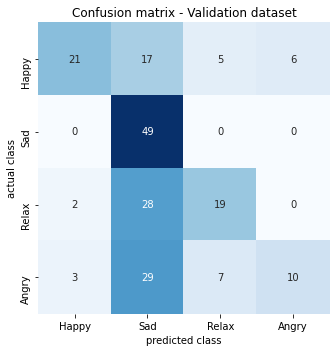

In [58]:
# Confusion Matrix for Validation Dataset

cm = metrics.confusion_matrix(y_valid, final_clf1.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['Happy','Sad','Relax','Angry'],
            xticklabels=['Happy','Sad','Relax','Angry'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

In [59]:
# Results : (Accuracy, precision, F1Score, Recall)

d1 = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [60]:
d1['ACC (%)'].append(acc_scorer(estimator=final_clf1, X=X_train, y_true=y_train))
d1['PRE (%)'].append(pre_scorer(estimator=final_clf1, X=X_train, y_true=y_train))
d1['REC (%)'].append(rec_scorer(estimator=final_clf1, X=X_train, y_true=y_train))
d1['F1 (%)'].append(f1_scorer(estimator=final_clf1, X=X_train, y_true=y_train))

d1['ACC (%)'].append(acc_scorer(estimator=final_clf1, X=X_valid, y_true=y_valid))
d1['PRE (%)'].append(pre_scorer(estimator=final_clf1, X=X_valid, y_true=y_valid))
d1['REC (%)'].append(rec_scorer(estimator=final_clf1, X=X_valid, y_true=y_valid))
d1['F1 (%)'].append(f1_scorer(estimator=final_clf1, X=X_valid, y_true=y_valid))

In [61]:
df_perform = pd.DataFrame(d1)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

ACC (%)  PRE (%)  REC (%)  F1 (%)
Training      70.24    83.73    69.00   70.29
Validation    50.51    61.10    50.51   47.81

In [62]:
# Validation 3 ( CountVectorizer and MultinominalNB())

final_clf2 = Pipeline([
                ('vect', CountVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=porter_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', MultinomialNB(alpha=1.0)),
               ])
final_clf2.fit(X_train, y_train)

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function porter_tokenizer at 0x000001B6F1DCBDC0>)),
                ('clf', MultinomialNB())])

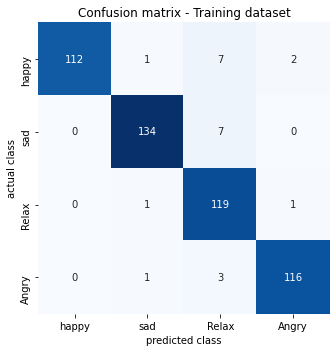

In [63]:
# Confusion Matrix for Training Dataset

import matplotlib as mpl
import numpy as np

cm = metrics.confusion_matrix(y_train, final_clf2.predict(X_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','Relax','Angry'],
            xticklabels=['happy','sad','Relax','Angry'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

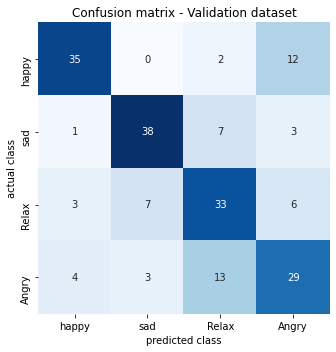

In [64]:
# Confusion Matrix for Validation Dataset


import matplotlib as mpl
import numpy as np

cm = metrics.confusion_matrix(y_valid, final_clf2.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','Relax','Angry'],
            xticklabels=['happy','sad','Relax','Angry'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

In [65]:
# Results : (Accuracy, precision, F1Score, Recall)

d2 = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [66]:
d2['ACC (%)'].append(acc_scorer(estimator=final_clf2, X=X_train, y_true=y_train))
d2['PRE (%)'].append(pre_scorer(estimator=final_clf2, X=X_train, y_true=y_train))
d2['REC (%)'].append(rec_scorer(estimator=final_clf2, X=X_train, y_true=y_train))
d2['F1 (%)'].append(f1_scorer(estimator=final_clf2, X=X_train, y_true=y_train))

d2['ACC (%)'].append(acc_scorer(estimator=final_clf2, X=X_valid, y_true=y_valid))
d2['PRE (%)'].append(pre_scorer(estimator=final_clf2, X=X_valid, y_true=y_valid))
d2['REC (%)'].append(rec_scorer(estimator=final_clf2, X=X_valid, y_true=y_valid))
d2['F1 (%)'].append(f1_scorer(estimator=final_clf2, X=X_valid, y_true=y_valid))

In [67]:
df_perform = pd.DataFrame(d2)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

ACC (%)  PRE (%)  REC (%)  F1 (%)
Training      95.44    95.70    95.46   95.45
Validation    68.88    69.64    68.88   69.12

In [68]:
# Validation 4 ( CountVectorizer and BernoulliNB())

final_clf3 = Pipeline([
                ('vect', CountVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=porter_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', BernoulliNB(alpha=1.0)),
               ])
final_clf3.fit(X_train, y_train)

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function porter_tokenizer at 0x000001B6F1DCBDC0>)),
                ('clf', BernoulliNB())])

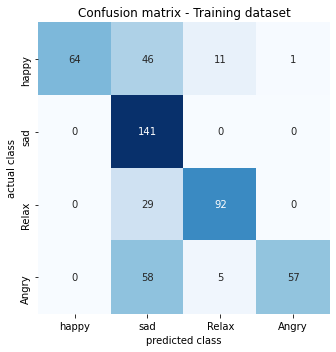

In [69]:
# Confusion Matrix for Training Dataset

import matplotlib as mpl
import numpy as np

cm = metrics.confusion_matrix(y_train, final_clf3.predict(X_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','Relax','Angry'],
            xticklabels=['happy','sad','Relax','Angry'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

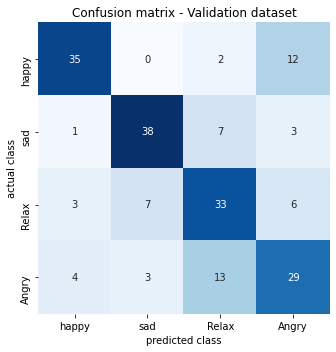

In [70]:
# Confusion Matrix for Validation Dataset


import matplotlib as mpl
import numpy as np

cm = metrics.confusion_matrix(y_valid, final_clf2.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(10, 5))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','Relax','Angry'],
            xticklabels=['happy','sad','Relax','Angry'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.show()

In [71]:
# Results : (Accuracy, precision, F1Score, Recall)

d3 = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [72]:
d3['ACC (%)'].append(acc_scorer(estimator=final_clf3, X=X_train, y_true=y_train))
d3['PRE (%)'].append(pre_scorer(estimator=final_clf3, X=X_train, y_true=y_train))
d3['REC (%)'].append(rec_scorer(estimator=final_clf3, X=X_train, y_true=y_train))
d3['F1 (%)'].append(f1_scorer(estimator=final_clf3, X=X_train, y_true=y_train))

d3['ACC (%)'].append(acc_scorer(estimator=final_clf3, X=X_valid, y_true=y_valid))
d3['PRE (%)'].append(pre_scorer(estimator=final_clf3, X=X_valid, y_true=y_valid))
d3['REC (%)'].append(rec_scorer(estimator=final_clf3, X=X_valid, y_true=y_valid))
d3['F1 (%)'].append(f1_scorer(estimator=final_clf3, X=X_valid, y_true=y_valid))

In [73]:
df_perform = pd.DataFrame(d3)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

ACC (%)  PRE (%)  REC (%)  F1 (%)
Training      70.24    83.73    69.00   70.29
Validation    50.51    61.10    50.51   47.81

In [74]:
# creates a dataframe with the accuracies of each ML algorithm with the vectorizer

dfObj = pd.DataFrame(columns=['Vectorizer', 'Algorithm', 'Accuracy'])
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'MultinomialNB','Accuracy':71.94}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'BernoulliNB','Accuracy':55.51}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'MultinomialNB','Accuracy':68.88}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'BernoulliNB','Accuracy':50.51}, ignore_index=True)

In [75]:
print("Dataframe Contens ", dfObj, sep='\n')

Dataframe Contens 
          Vectorizer      Algorithm  Accuracy
0  TF-IDF Vectroizer  MultinomialNB     71.94
1  TF-IDF Vectroizer    BernoulliNB     55.51
2   Count Vectroizer  MultinomialNB     68.88
3   Count Vectroizer    BernoulliNB     50.51


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


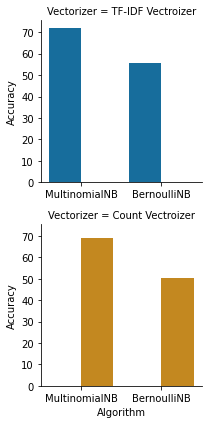

In [76]:
# Displays the results of Algorithm vs Accuracy in bar plot

import seaborn as sns

sns.factorplot(x='Algorithm', y='Accuracy', hue='Vectorizer', data=dfObj, kind='bar',row="Vectorizer",size=3,sharex='row'
               ,palette='colorblind')

In [110]:
#Section - 3 : Lyric Feature Analysis: 

####################  4)  Semantic Features: Porter stemming and Snowball Stemming  ###############################

In [133]:
# Reading Training and Validation Dataset

import pandas as pd

df_train = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Mood Classification/SongLyrics.csv', encoding='latin-1')
df_test = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Mood Classification/Validation_Set.csv', encoding= 'latin-1')

X_train = df_train['Lyrics'].values.astype('U')
y_train = df_train['Mood'].values.astype('U')

X_test = df_test['Lyrics'].values.astype('U')
y_test = df_test['Mood'].values.astype('U')


df_test.tail(10)

ï»¿Artist    Genre                    Title  \
186            Garth Brooks  Country          Papa Loved Mama   
187           George Strait  Country             Give It Away   
188           Hank Williams  Country                 Kaw-Liga   
189              Lil Boosie  Hip-Hop               I Remember   
190            Loretta Lynn  Country  Wouldnât It Be Great?   
191  Manic Street Preachers     Rock    Walk Me To The Bridge   
192             Maxi Priest   Reggae      God Watches Over Us   
193         Miranda Lambert  Country     Running Just in Case   
194                 Nirvana     Rock   You Know You are Right   
195              Pink Floyd      Pop            Dogs,Shine On   

                                                Lyrics Mood  
186  Papa drove a truck nearly all his life\nYou kn...  Sad  
187  She was storming through the house that day\nA...  Sad  
188  Kaw-Liga was a wooden Indian standing by the d...  Sad  
189  I remember nigga\nBoosie Bad Azz\nI remember n...  Sad  
190  Wouldn't it be fine\nIf you could say you love...  Sad  
191  Driving slowly to the bridge\nWith nothing lef...  Sad  
192  Mmm oh yeah blessed be the father oh\nSometime...  Sad  
193  There's trouble where I'm going\nBut I'm gonna...  Sad  
194  I will never bother you\nI will never promise ...  Sad  
195  You got to be crazy, you gotta have a real nee...  Sad

In [134]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np


le = LabelEncoder()
print('before: %s ...' %y_train[:10])

le.fit(y_train)
le.fit(y_test)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

print('after: %s ...' %y_train[:10])

before: ['Angry ' 'Happy' 'Sad' 'Relax' 'Angry ' 'Angry ' 'Angry ' 'Angry '
 'Happy' 'Relax'] ...
after: [0 1 3 2 0 0 0 0 1 2] ...


In [136]:
# StopWords List

with open('C:/Users/Gagan Rangu/Desktop/Mood Classification/stopwords_eng.txt') as sw:
    stopwords = sw.read().split()
stopwords[-10:]

['shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [137]:
# Feature Extraction : Porter Stemmer and Whitelist Words ( Tfidf Vectorizer and CountVectorizer )##################

In [138]:
# Initial Vocabulary


from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

import re

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: text.split(),
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_1 = vec_porter.get_feature_names()
print(vocab_1[-30:])

Vocabular size: 9708 words
['youtube', 'yugoslavian', 'yuh', 'yule', 'yuletide', 'yup', 'yutes', 'yves', 'z', 'zach', 'zag', 'zapora', 'zero', 'zhirinovsky', 'zig', 'zilla', 'zimbabwe', 'zion', 'zipped', 'zipper', 'zippers', 'zippin', 'zippity', 'zippo', 'zitos', 'zombie', 'zombies', 'zone', 'zoning', 'zoo']


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [139]:
# Porter Stemming Vocabulary

# With Porter Stemming

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split()],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_2 = vec_porter.get_feature_names()
print(vocab_2[-30:])

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Vocabular size: 7498 words
['youngin', 'yourselv', 'youth', 'youtub', 'yugoslavian', 'yuh', 'yule', 'yuletid', 'yup', 'yute', 'yve', 'z', 'zach', 'zag', 'zapora', 'zero', 'zhirinovski', 'zig', 'zilla', 'zimbabw', 'zion', 'zip', 'zipper', 'zippin', 'zippiti', 'zippo', 'zito', 'zombi', 'zone', 'zoo']


In [140]:
# With WhiteList ( Positive aand Negative Words) Vocabulary

with open('C:/Users/Gagan Rangu/Desktop/Mood Classification/negative-words.txt', 'r') as w:
    negative_words = w.read().split()
print('number of negative words: %s' % len(negative_words))
negative_words[-5:]

number of negative words: 4996


['zaps', 'zealot', 'zealous', 'zealously', 'zombie']

In [141]:
with open('C:/Users/Gagan Rangu/Desktop/Mood Classification/positive-words.txt', 'r') as w:
    positive_words = w.read().split()
print('number of positive words: %s' % len(negative_words))
positive_words[-5:]

number of positive words: 4996


['youthful', 'zeal', 'zenith', 'zest', 'zippy']

In [142]:
negative_words = set(negative_words)
positive_words = set(positive_words)
semantic_words = negative_words.union(positive_words)

In [143]:
# Initial Vocabulary With whitelist 

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [word for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_3 = vec_porter.get_feature_names()
print(vocab_3[-10:])

Vocabular size: 1416 words
['worthy', 'wound', 'wounds', 'wow', 'wrath', 'wreak', 'wreck', 'wrong', 'yay', 'zombie']


In [144]:
# With whitelist and Porter Stemming

# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_4 = vec_porter.get_feature_names()
print(vocab_4[-10:])

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Vocabular size: 1155 words
['worthi', 'worthless', 'wound', 'wow', 'wrath', 'wreak', 'wreck', 'wrong', 'yay', 'zombi']


In [145]:
# Vocabulary Summary

print('All words: %s ' % len(vocab_1))
print('Porter: %s ' % len(vocab_2))
print('Whitelist: %s ' % len(vocab_3))
print('Porter + Whitelist: %s ' % len(vocab_4))

All words: 9708 
Porter: 7498 
Whitelist: 1416 
Porter + Whitelist: 1155 


In [146]:
# Requirements

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
import re
import pickle
from sklearn import metrics

porter = PorterStemmer()

with open('C:/Users/Gagan Rangu/Desktop/Mood Classification/stopwords_eng.txt') as sw:
    stop_words = sw.read().split()
    
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, average='micro')

In [147]:
# ******************************** Model Selection *****************************

In [148]:
# Conveting Text into BagOfWords models - Multiple tokenizers are used

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

# Only words that are in a list of 'positive' or 'negative' words ('whitelist')
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
tokenizer_whitelist = lambda text: [word for word in text.split() if word in semantic_words]

# Porter-stemmed words in whitelist
tokenizer_porter_wl = lambda text: [porter.stem(word) for word in text.split() if word in semantic_words]

# Snowball-stemmed words in whitelist
tokenizer_snowball_wl = lambda text: [snowball.stem(word) for word in text.split() if word in semantic_words]

In [149]:
# Total Vocabulary List

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from mlxtend.preprocessing import DenseTransformer

vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  

vect_4 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)  

vect_5 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_6 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

vect_7 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_8 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_9 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)

vect_10 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)    

vect_11 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_12 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)


pipelines = []
vectorizers = [vect_1, vect_2, vect_3, vect_4, vect_5, vect_6, vect_7, vect_8, vect_9, vect_10, vect_11, vect_12]
for v in vectorizers:
    pipelines.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf', RandomForestClassifier(n_estimators=100))]))

In [150]:
print('Vocabulary sizes\n')
labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]

for label, v in zip(labels, vectorizers):
    v.fit(X_train)
    print('%s: %s' % (label, len(v.vocabulary_)))

Vocabulary sizes



c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVec: 9708


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVec porter: 7498


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVec snowball: 7469
CountVec wl: 1416


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVec porter+wl: 1155


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVec snowball+wl: 1139
TfidfVec: 9708
TfidfVec porter: 7498
TfidfVec snowball: 7469
TfidfVec wl: 1416
TfidfVec porter+wl: 1155
TfidfVec snowball+wl: 1139


In [151]:
# Feature Extraction - Cross Validation Error

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]



d = {'Data':labels,
     'ROC AUC (%)':[],}

for i,clf in enumerate(pipelines):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    print('clf %s, %s: %s' % (i+1, labels[i], scores.mean()*100))
    d['ROC AUC (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

clf 1, CountVec: 42.8235294117647


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\featur

clf 2, CountVec porter: 40.04313725490196


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_w

clf 3, CountVec snowball: 41.878431372549024
clf 4, CountVec wl: 42.85098039215686


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gaga

clf 5, CountVec porter+wl: 40.87450980392157


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local

clf 6, CountVec snowball+wl: 38.47843137254902
clf 7, TfidfVec: 44.239215686274505


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\featur

clf 8, TfidfVec porter: 44.21176470588236


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_w

clf 9, TfidfVec snowball: 42.074509803921565
clf 10, TfidfVec wl: 45.63529411764706


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'thi'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gaga

clf 11, TfidfVec porter+wl: 40.666666666666664


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\gagan rangu\appdata\local

clf 12, TfidfVec snowball+wl: 42.435294117647054


In [152]:
# Feature Extraction - Cross Validation Error

df_perform = pd.DataFrame(d)
df_perform = df_perform['ROC AUC (%)']
df_perform.index=(labels)
df_perform

CountVec                42.82 (+/- 6.95)
CountVec porter         40.04 (+/- 4.75)
CountVec snowball       41.88 (+/- 4.93)
CountVec wl             42.85 (+/- 5.42)
CountVec porter+wl      40.87 (+/- 5.60)
CountVec snowball+wl    38.48 (+/- 7.41)
TfidfVec                44.24 (+/- 3.87)
TfidfVec porter         44.21 (+/- 6.42)
TfidfVec snowball       42.07 (+/- 4.33)
TfidfVec wl             45.64 (+/- 4.99)
TfidfVec porter+wl      40.67 (+/- 4.19)
TfidfVec snowball+wl    42.44 (+/- 5.41)
Name: ROC AUC (%), dtype: object

In [160]:
# Validation 

X_train_feat = vect.fit_transform(X_train, y_train)
X_train_feat = X_train_feat.toarray()

In [161]:
# Accuracy Score

from sklearn import metrics

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)

In [162]:
# Results : (Accuracy)

labels = ['Train CountVec', 'Train CountVec porter', 'Train CountVec snowball', 'Train CountVec wl', 
          'Train CountVec porter+wl','Train CountVec snowball+wl',
          'Train TfidfVec', 'Train TfidfVec porter', 'Train TfidfVec snowball', 'Train TfidfVec wl', 
          'Train TfidfVec porter+wl','Train TfidfVec snowball+wl',
          'Test CountVec', 'Test CountVec porter', 'Test CountVec snowball', 'Test CountVec wl', 
          'Test CountVec porter+wl','Test CountVec snowball+wl',
          'Test TfidfVec', 'Test TfidfVec porter', 'Test TfidfVec snowball', 'Test TfidfVec wl', 
          'Test TfidfVec porter+wl','Test TfidfVec snowball+wl',]

d = {'Data':labels,
     'ACC (%)':[],
     
    }

for clf in pipelines:
    clf.fit(X_train, y_train)

for clf in pipelines:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_train, y_true=y_train))

for clf in pipelines:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_test, y_true=y_test))

In [164]:
#Results

pd.set_option('precision', 2)
df_perform = pd.DataFrame(d,)
df_perform = df_perform[['ACC (%)']]
df_perform.index=(labels)
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

ACC (%)
Train CountVec               100.00
Train CountVec porter        100.00
Train CountVec snowball      100.00
Train CountVec wl            100.00
Train CountVec porter+wl     100.00
Train CountVec snowball+wl   100.00
Train TfidfVec               100.00
Train TfidfVec porter        100.00
Train TfidfVec snowball      100.00
Train TfidfVec wl            100.00
Train TfidfVec porter+wl     100.00
Train TfidfVec snowball+wl   100.00
Test CountVec                 73.47
Test CountVec porter          75.51
Test CountVec snowball        69.90
Test CountVec wl              72.96
Test CountVec porter+wl       74.49
Test CountVec snowball+wl     72.45
Test TfidfVec                 71.94
Test TfidfVec porter          71.43
Test TfidfVec snowball        72.96
Test TfidfVec wl              70.92
Test TfidfVec porter+wl       71.43
Test TfidfVec snowball+wl     72.45